In [ ]:
# @title
# Install packages
!pip install -q pymc arviz numpy pandas scipy matplotlib seaborn scikit-learn ucimlrepo

# Import libraries
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(505)

# Load dataset
students_data = fetch_ucirepo(id=697)
X = students_data.data.features
y = students_data.data.targets
df = pd.concat([X, y], axis=1)

print(f"Dataset loaded: {df.shape}")
df.head()

Dataset loaded: (4424, 37)


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Step 2: Data Understanding & Cleaning

# 1. Basic Data Overview
# Purpose: See what we're working with - rows, columns, data types
print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)
print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

# 2. Check Data Types
# Purpose: Know which columns are numbers vs categories
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)

# 3. Check Missing Values
# Purpose: Find if any data is missing - missing data can break models
print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found!")

# 4. Look at Target Variable
# Purpose: Understand our outcome - who dropped out, who graduated, who's enrolled
print("\n" + "=" * 60)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 60)
print(df['Target'].value_counts())
print("\nPercentages:")
print(df['Target'].value_counts(normalize=True) * 100)

# 5. Create Binary Target
# Purpose: Convert 3 categories into 2 - "Dropout" vs "Not Dropout"
# Why? Logistic regression works with binary outcomes (0 or 1)
print("\n" + "=" * 60)
print("CREATING BINARY TARGET")
print("=" * 60)

# Create new column: 1 = Dropout, 0 = Not Dropout (Graduate or Enrolled)
df['Dropout'] = (df['Target'] == 'Dropout').astype(int)

print("Original Target -> New Binary Target:")
print(df.groupby('Target')['Dropout'].first())

print("\nNew binary target distribution:")
print(df['Dropout'].value_counts())
print(f"\nDropout rate: {df['Dropout'].mean()*100:.2f}%")

# 6. Look at Key Variables
# Purpose: Understand the variables mentioned in our proposal
print("\n" + "=" * 60)
print("KEY VARIABLES FOR ANALYSIS")
print("=" * 60)

key_vars = ['Course', 'Scholarship holder', 'Tuition fees up to date', 'Age at enrollment']

for var in key_vars:
    if var in df.columns:
        print(f"\n{var}:")
        if df[var].dtype == 'object' or df[var].nunique() < 20:
            print(df[var].value_counts())
        else:
            print(f"  Mean: {df[var].mean():.2f}")
            print(f"  Min: {df[var].min()}")
            print(f"  Max: {df[var].max()}")
    else:
        print(f"\n{var}: NOT FOUND in dataset")

# 7. Summary Statistics
# Purpose: Get numerical summaries of all numeric columns
print("\n" + "=" * 60)
print("SUMMARY STATISTICS (Numeric Columns)")
print("=" * 60)
print(df.describe().T)

# 8. Save Cleaned Data
# Purpose: Save our work so we don't have to repeat these steps
df.to_csv('students_cleaned.csv', index=False)
print("\n✓ Cleaned data saved as 'students_cleaned.csv'")

print("\n" + "=" * 60)
print("STEP 2 COMPLETE - DATA CLEANED AND UNDERSTOOD")
print("=" * 60)

DATA OVERVIEW

Dataset shape: 4424 rows, 37 columns

Column names:
['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'U

STEP 3: FEATURE SELECTION & EDA (SIMPLIFIED)

1. SELECTING KEY PREDICTORS

Selected predictors:
  1. Curricular units 1st sem (approved)
  2. Scholarship holder
  3. Age at enrollment

Grouping variable: Course
Target: Dropout (binary)

2. CREATING MODELING DATASET

Dataset shape: (4424, 5)
Features: 3
Samples: 4424
Courses: 17

✓ No missing values

3. EXPLORATORY DATA ANALYSIS

Overall Dropout Rate: 32.12%

--- Dropout Rate by Course ---
        Dropout_Rate  N_Students
Course                          
33         66.666667          12
9130       55.319149         141
9119       54.117647         170
9991       50.746269         268
9853       44.270833         192
9003       40.952381         210
9556       38.372093          86
171        38.139535         215
9254       38.095238         252
9670       35.447761         268
9147       35.263158         380
8014       33.023256         215
9773       30.513595         331
9085       26.706231         337
9070       22.566372         

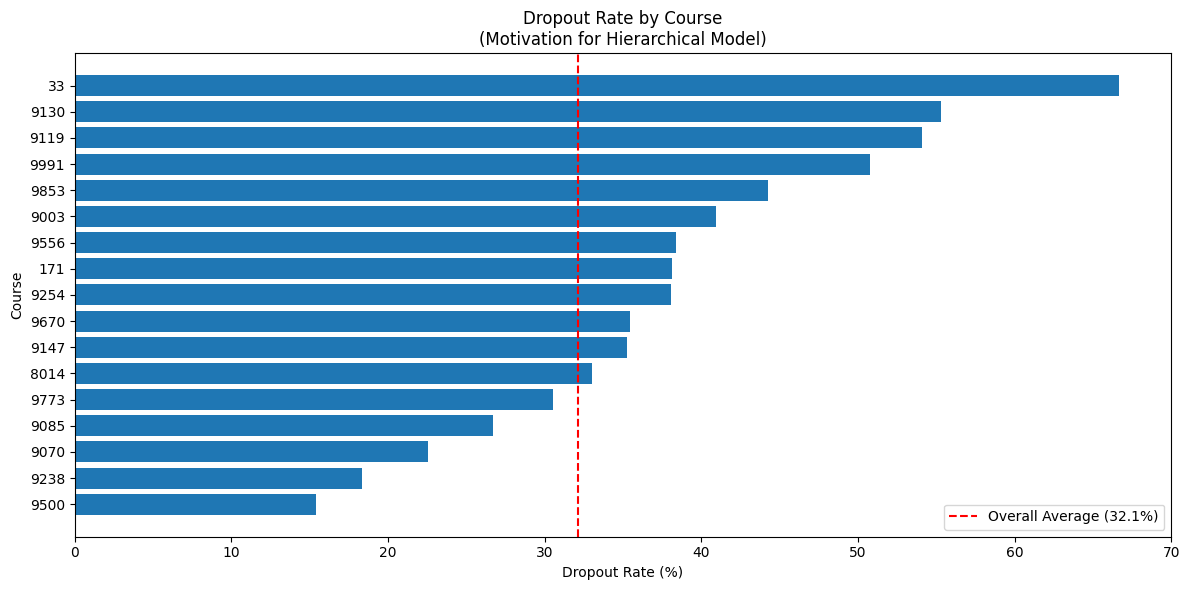

✓ Saved: predictors_vs_dropout_simple.png


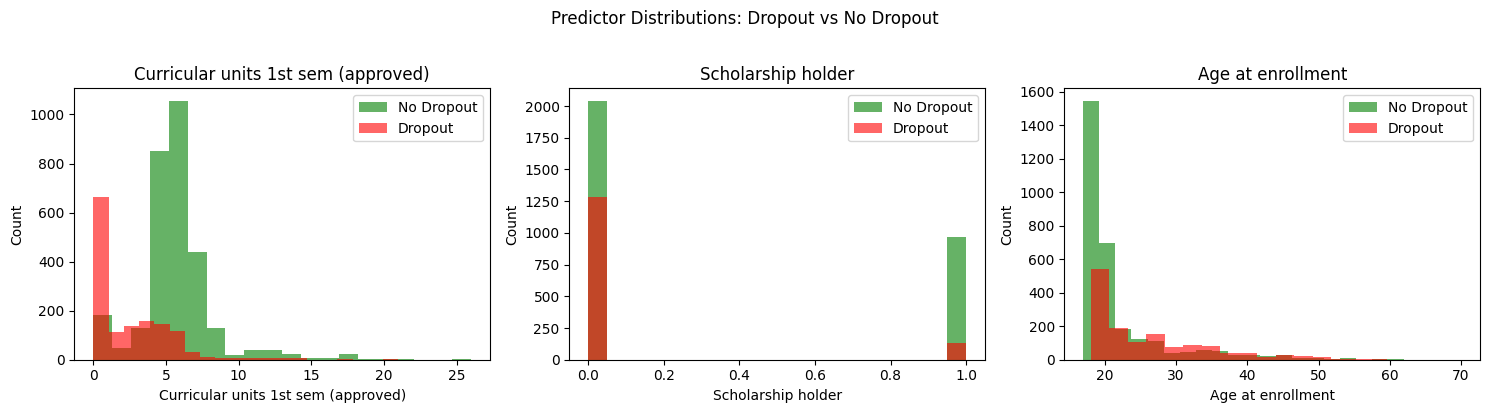


5. SAVING PREPARED DATASET

✓ Saved: students_model_simple.csv
  Predictors: 3
  Courses: 17
  Samples: 4424

STEP 3 COMPLETE - SIMPLIFIED APPROACH

✓ Selected 3 interpretable predictors:
  1. Academic: 1st semester approved courses
  2. Financial: Scholarship holder
  3. Demographics: Age at enrollment

✓ Key insight:
  - Dropout varies from 15.4% to 66.7% across courses
  - This 51.3 percentage point range justifies hierarchical modeling!

✓ Model will be manageable:
  - 3 predictors × 17 courses = ~51 course-level parameters
  - Plus population-level hyperparameters
  
NEXT: Step 4 - Build baseline model (complete pooling)



In [ ]:
# Step 3: Simplified Feature Selection & EDA

print("=" * 80)
print("STEP 3: FEATURE SELECTION & EDA (SIMPLIFIED)")
print("=" * 80)

# =============================================================================
# PART 1: SELECT KEY PREDICTORS (Only 3!)
# =============================================================================

print("\n1. SELECTING KEY PREDICTORS\n")

# Based on theory and literature, we select 3 interpretable predictors:
# 1. Academic performance (strongest predictor)
# 2. Financial support (equity/access issue)
# 3. Student demographics (life circumstances)

predictors = [
    'Curricular units 1st sem (approved)',  # Academic performance
    'Scholarship holder',                    # Financial support
    'Age at enrollment'                      # Demographics
]

grouping_var = 'Course'  # For hierarchical model

print("Selected predictors:")
for i, pred in enumerate(predictors, 1):
    print(f"  {i}. {pred}")
print(f"\nGrouping variable: {grouping_var}")
print(f"Target: Dropout (binary)")

# =============================================================================
# PART 2: CREATE MODELING DATASET
# =============================================================================

print("\n" + "=" * 80)
print("2. CREATING MODELING DATASET")
print("=" * 80)

# Select only needed columns
df_model = df[predictors + [grouping_var, 'Dropout']].copy()

print(f"\nDataset shape: {df_model.shape}")
print(f"Features: {len(predictors)}")
print(f"Samples: {len(df_model)}")
print(f"Courses: {df_model[grouping_var].nunique()}")

# Check missing values
missing = df_model.isnull().sum()
if missing.sum() > 0:
    print(f"\nMissing values:\n{missing[missing > 0]}")
else:
    print("\n✓ No missing values")

# =============================================================================
# PART 3: BASIC EDA
# =============================================================================

print("\n" + "=" * 80)
print("3. EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Overall dropout rate
print(f"\nOverall Dropout Rate: {df_model['Dropout'].mean()*100:.2f}%")

# Dropout by Course
print("\n--- Dropout Rate by Course ---")
dropout_by_course = df_model.groupby(grouping_var)['Dropout'].agg(['mean', 'count'])
dropout_by_course.columns = ['Dropout_Rate', 'N_Students']
dropout_by_course['Dropout_Rate'] = dropout_by_course['Dropout_Rate'] * 100
dropout_by_course = dropout_by_course.sort_values('Dropout_Rate', ascending=False)
print(dropout_by_course)

print(f"\nVariation across courses:")
print(f"  Highest: {dropout_by_course['Dropout_Rate'].max():.1f}%")
print(f"  Lowest: {dropout_by_course['Dropout_Rate'].min():.1f}%")
print(f"  Range: {dropout_by_course['Dropout_Rate'].max() - dropout_by_course['Dropout_Rate'].min():.1f} percentage points")

# Compare predictors between dropout vs not dropout
print("\n--- Predictor Comparison: Dropout vs Not Dropout ---")
for pred in predictors:
    dropout_mean = df_model[df_model['Dropout']==1][pred].mean()
    no_dropout_mean = df_model[df_model['Dropout']==0][pred].mean()
    print(f"\n{pred}:")
    print(f"  Dropout: {dropout_mean:.2f}")
    print(f"  No Dropout: {no_dropout_mean:.2f}")
    print(f"  Difference: {no_dropout_mean - dropout_mean:.2f}")

# =============================================================================
# PART 4: VISUALIZATIONS
# =============================================================================

print("\n" + "=" * 80)
print("4. VISUALIZATIONS")
print("=" * 80)

# Figure 1: Dropout by Course
plt.figure(figsize=(12, 6))
dropout_sorted = dropout_by_course.sort_values('Dropout_Rate')
plt.barh(range(len(dropout_sorted)), dropout_sorted['Dropout_Rate'])
plt.yticks(range(len(dropout_sorted)), dropout_sorted.index)
plt.xlabel('Dropout Rate (%)')
plt.ylabel('Course')
plt.title('Dropout Rate by Course\n(Motivation for Hierarchical Model)')
plt.axvline(df_model['Dropout'].mean()*100, color='red', linestyle='--',
            label=f'Overall Average ({df_model["Dropout"].mean()*100:.1f}%)')
plt.legend()
plt.tight_layout()
plt.savefig('dropout_by_course_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: dropout_by_course_simple.png")
plt.show()

# Figure 2: Three predictors comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, pred in enumerate(predictors):
    axes[i].hist(df_model[df_model['Dropout']==0][pred],
                 bins=20, alpha=0.6, label='No Dropout', color='green')
    axes[i].hist(df_model[df_model['Dropout']==1][pred],
                 bins=20, alpha=0.6, label='Dropout', color='red')
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Count')
    axes[i].set_title(pred)
    axes[i].legend()

plt.suptitle('Predictor Distributions: Dropout vs No Dropout', y=1.02)
plt.tight_layout()
plt.savefig('predictors_vs_dropout_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: predictors_vs_dropout_simple.png")
plt.show()

# =============================================================================
# PART 5: SAVE PREPARED DATASET
# =============================================================================

print("\n" + "=" * 80)
print("5. SAVING PREPARED DATASET")
print("=" * 80)

df_model.to_csv('students_model_simple.csv', index=False)
print(f"\n✓ Saved: students_model_simple.csv")
print(f"  Predictors: {len(predictors)}")
print(f"  Courses: {df_model[grouping_var].nunique()}")
print(f"  Samples: {len(df_model)}")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 3 COMPLETE - SIMPLIFIED APPROACH")
print("=" * 80)

print(f"""
✓ Selected 3 interpretable predictors:
  1. Academic: 1st semester approved courses
  2. Financial: Scholarship holder
  3. Demographics: Age at enrollment

✓ Key insight:
  - Dropout varies from {dropout_by_course['Dropout_Rate'].min():.1f}% to {dropout_by_course['Dropout_Rate'].max():.1f}% across courses
  - This {dropout_by_course['Dropout_Rate'].max() - dropout_by_course['Dropout_Rate'].min():.1f} percentage point range justifies hierarchical modeling!

✓ Model will be manageable:
  - 3 predictors × 17 courses = ~51 course-level parameters
  - Plus population-level hyperparameters

NEXT: Step 4 - Build baseline model (complete pooling)
""")

print("=" * 80)

STEP 4: BASELINE MODEL - COMPLETE POOLING

1. PREPARING DATA

Dataset: 4424 students, 3 predictors
Dropout rate: 32.12%
Number of courses: 17

✓ Features standardized (mean=0, std=1)

2. PRIOR PREDICTIVE CHECK

What is this? Simulating data from priors BEFORE seeing real data
Why? To ensure our priors don't produce absurd predictions

Prior predictive dropout probabilities:
  Mean: 0.49
  5th percentile: 0.00
  95th percentile: 1.00

✓ Priors look reasonable (not predicting all 0s or all 1s)

3. FITTING BASELINE MODEL

Complete Pooling = treats all students the same (ignores Course)
This is our baseline to beat with hierarchical models!

Sampling (this takes ~1 minute)...


Output()


✓ Sampling complete!

4. MCMC CONVERGENCE DIAGNOSTICS

R-hat values (convergence check):
  Max R-hat: 1.0055
  ✓ Excellent convergence (R-hat < 1.1)


Output()


Effective sample size:
  Min ESS: 1580
  ✓ Good effective sample size

5. POSTERIOR SUMMARY

Parameter estimates:
                     mean     sd  hdi_2.5%  hdi_97.5%
Intercept          -1.079  0.044    -1.161     -0.990
1st sem approved   -1.387  0.052    -1.496     -1.287
Scholarship holder -0.443  0.048    -0.539     -0.354
Age at enrollment   0.479  0.039     0.405      0.557

Interpretation (on log-odds scale):
  • 1st sem approved: decreases dropout risk
  • Scholarship holder: decreases dropout risk
  • Age at enrollment: increases dropout risk

6. POSTERIOR PREDICTIVE CHECK

What is this? Simulate new data from fitted model
Why? Check if model captures key patterns in real data



Observed dropout rate: 32.12%
Predicted dropout rate: 32.13% ± 0.81%
✓ Model captures overall dropout rate well

7. VISUALIZATIONS
✓ Saved: traces_pooled_simple.png


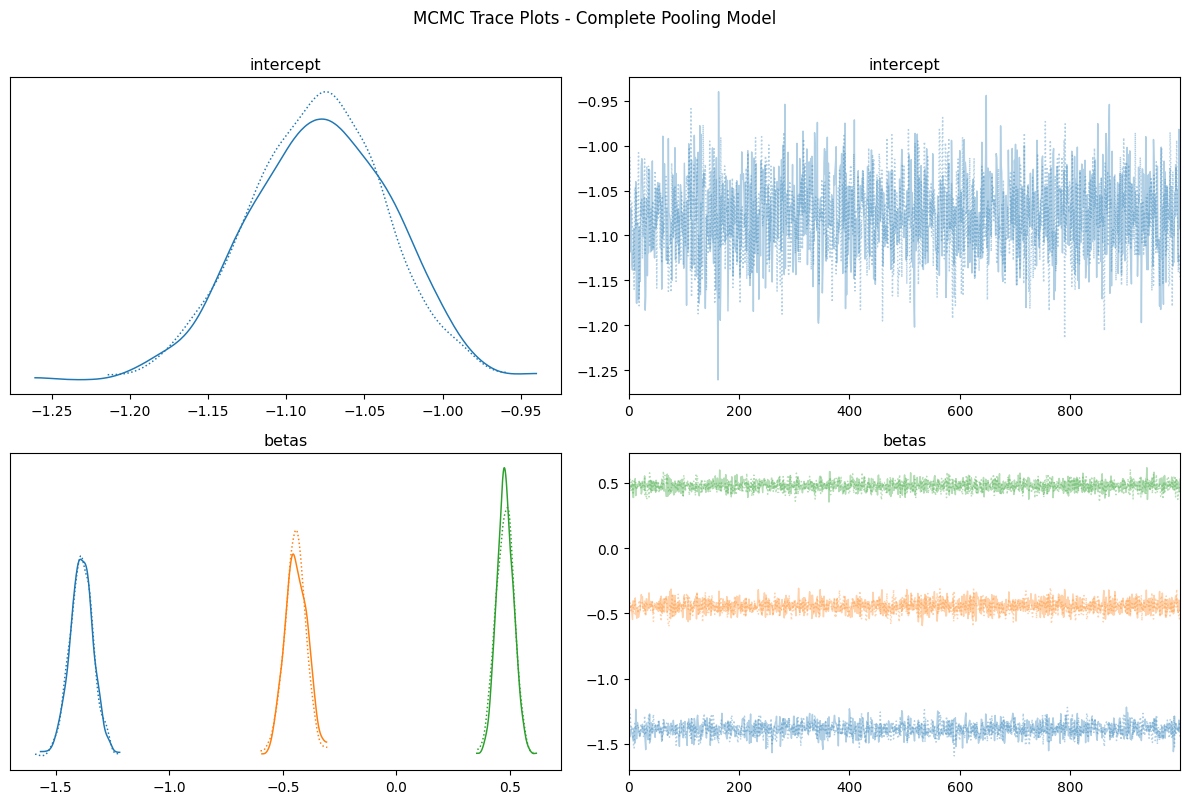

✓ Saved: posterior_pooled_simple.png


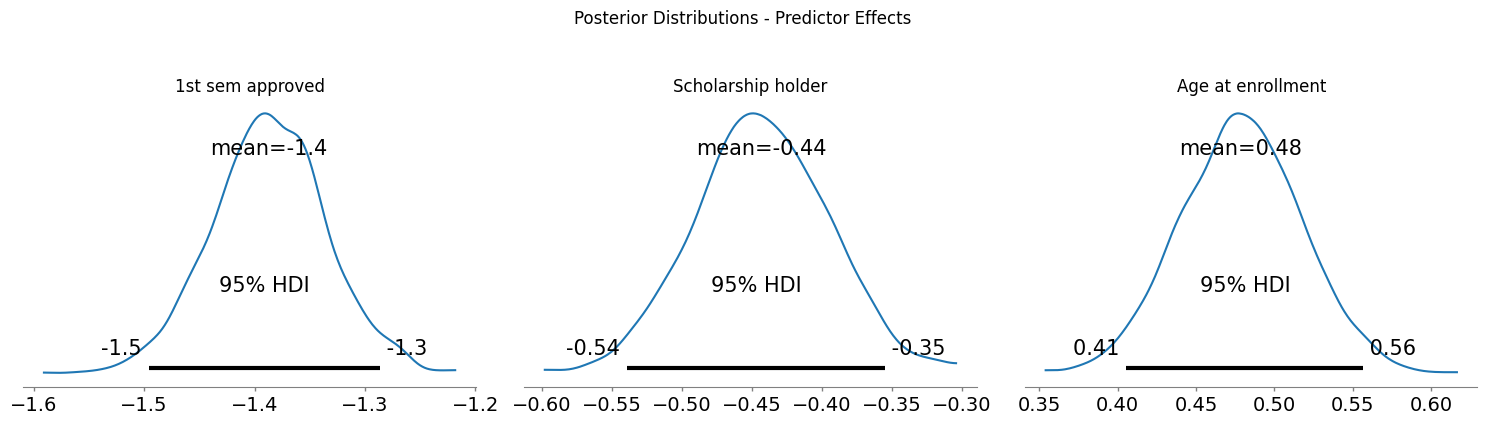

✓ Saved: ppc_pooled_simple.png


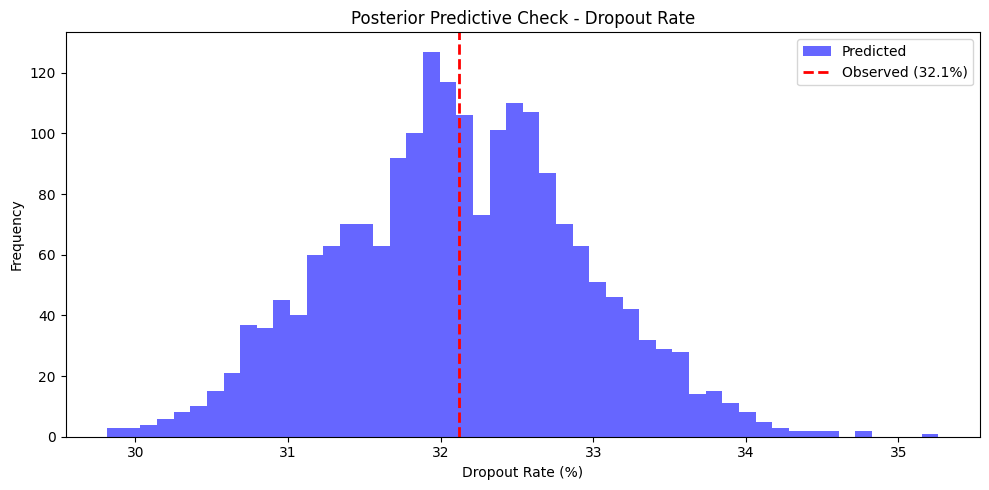


8. SAVING RESULTS
✓ Saved: trace_pooled_simple.nc
✓ Saved: scaler.pkl

STEP 4 COMPLETE - BASELINE MODEL FITTED

✓ Complete Pooling Model Results:
  - Convergence: R-hat = 1.0055 (< 1.1 is good)
  - Effective samples: 1580 (> 400 is good)
  - Model captures overall dropout rate: 32.1%

✓ Key finding:
  This model assumes effects are SAME for all courses.
  But we saw 17 courses have dropout rates
  ranging from 15.4%
  to 66.7%!

✓ Next steps (Member 2):
  1. Build "No Pooling" model (separate model per course)
  2. Build "Hierarchical" model (partial pooling)
  3. Compare all three using WAIC/LOO-CV

YOUR WORK (Member 1) IS COMPLETE! ✅
Pass this to Member 2 for hierarchical modeling.



In [ ]:
# Step 4: Simplified Baseline Model (Complete Pooling)

print("=" * 80)
print("STEP 4: BASELINE MODEL - COMPLETE POOLING")
print("=" * 80)

# =============================================================================
# PART 1: LOAD AND PREPARE DATA
# =============================================================================

print("\n1. PREPARING DATA\n")

# Load simplified dataset
df_model = pd.read_csv('students_model_simple.csv')

# Separate features and target
X = df_model[['Curricular units 1st sem (approved)',
              'Scholarship holder',
              'Age at enrollment']].values
y = df_model['Dropout'].values
course = df_model['Course'].values

print(f"Dataset: {X.shape[0]} students, {X.shape[1]} predictors")
print(f"Dropout rate: {y.mean()*100:.2f}%")
print(f"Number of courses: {len(np.unique(course))}")

# Standardize predictors
# Why? Puts all features on same scale for better MCMC performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✓ Features standardized (mean=0, std=1)")

# =============================================================================
# PART 2: PRIOR PREDICTIVE CHECK
# =============================================================================

print("\n" + "=" * 80)
print("2. PRIOR PREDICTIVE CHECK")
print("=" * 80)

print("\nWhat is this? Simulating data from priors BEFORE seeing real data")
print("Why? To ensure our priors don't produce absurd predictions\n")

# Build model for prior predictive check
with pm.Model() as model_prior_check:

    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=2)
    betas = pm.Normal('betas', mu=0, sigma=2, shape=X_scaled.shape[1])

    # Linear model
    logit_p = intercept + pm.math.dot(X_scaled, betas)
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))

    # Sample from prior (no data yet!)
    prior_samples = pm.sample_prior_predictive(samples=1000, random_seed=505)

# Check if priors are reasonable
prior_p = prior_samples.prior['p'].values.flatten()
print(f"Prior predictive dropout probabilities:")
print(f"  Mean: {prior_p.mean():.2f}")
print(f"  5th percentile: {np.percentile(prior_p, 5):.2f}")
print(f"  95th percentile: {np.percentile(prior_p, 95):.2f}")

if prior_p.mean() > 0.2 and prior_p.mean() < 0.8:
    print("\n✓ Priors look reasonable (not predicting all 0s or all 1s)")
elif prior_p.mean() == 0 or prior_p.mean() == 1:
    print("\n⚠ Priors might be too extreme (all 0s or all 1s) - consider adjusting")
else:
    print("\n⚠ Priors might be too extreme - consider adjusting")

# =============================================================================
# PART 3: FIT BASELINE MODEL (COMPLETE POOLING)
# =============================================================================

print("\n" + "=" * 80)
print("3. FITTING BASELINE MODEL")
print("=" * 80)

print("\nComplete Pooling = treats all students the same (ignores Course)")
print("This is our baseline to beat with hierarchical models!\n")

with pm.Model() as model_pooled:

    # Priors (weakly informative)
    intercept = pm.Normal('intercept', mu=0, sigma=2)
    betas = pm.Normal('betas', mu=0, sigma=2, shape=X_scaled.shape[1])

    # Linear model
    logit_p = intercept + pm.math.dot(X_scaled, betas)
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))

    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample posterior
    print("Sampling (this takes ~1 minute)...")
    trace_pooled = pm.sample(
        draws=1000,
        tune=1000,
        chains=2,
        random_seed=505,
        return_inferencedata=True,
        idata_kwargs={"log_likelihood": True}, # ADDED THIS LINE
        progressbar=True
    )

print("\n✓ Sampling complete!")

# =============================================================================
# PART 4: MCMC DIAGNOSTICS
# =============================================================================

print("\n" + "=" * 80)
print("4. MCMC CONVERGENCE DIAGNOSTICS")
print("=" * 80)

# Check R-hat (should be < 1.1)
print("\nR-hat values (convergence check):")
rhat = az.rhat(trace_pooled)
max_rhat = float(max([rhat[var].max().values for var in rhat.data_vars]))
print(f"  Max R-hat: {max_rhat:.4f}")

if max_rhat < 1.1:
    print("  ✓ Excellent convergence (R-hat < 1.1)")
else:
    print("  ⚠ Poor convergence (need more samples)")

# Check effective sample size
ess = az.ess(trace_pooled)
min_ess = float(min([ess[var].min().values for var in ess.data_vars]))
print(f"\nEffective sample size:")
print(f"  Min ESS: {min_ess:.0f}")

if min_ess > 400:
    print("  ✓ Good effective sample size")
else:
    print("  ⚠ Low ESS (need more samples)")

# =============================================================================
# PART 5: POSTERIOR SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("5. POSTERIOR SUMMARY")
print("=" * 80)

# Get summary
summary = az.summary(trace_pooled, var_names=['intercept', 'betas'],
                     hdi_prob=0.95)

# Add feature names
feature_names = ['Intercept',
                 '1st sem approved',
                 'Scholarship holder',
                 'Age at enrollment']
summary.index = feature_names

print("\nParameter estimates:")
print(summary[['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']])

print("\nInterpretation (on log-odds scale):")
for i, name in enumerate(feature_names):
    if i == 0:
        continue
    mean_val = summary.loc[name, 'mean']
    if abs(mean_val) > 0.1:
        direction = "increases" if mean_val > 0 else "decreases"
        print(f"  • {name}: {direction} dropout risk")

# =============================================================================
# PART 6: POSTERIOR PREDICTIVE CHECK
# =============================================================================

print("\n" + "=" * 80)
print("6. POSTERIOR PREDICTIVE CHECK")
print("=" * 80)

print("\nWhat is this? Simulate new data from fitted model")
print("Why? Check if model captures key patterns in real data\n")

# Generate posterior predictions
with model_pooled:
    ppc = pm.sample_posterior_predictive(trace_pooled, random_seed=505)

# Compare observed vs predicted dropout rate
y_pred = ppc.posterior_predictive['y_obs'].values.reshape(-1, len(y))
predicted_rates = y_pred.mean(axis=1)

print(f"Observed dropout rate: {y.mean()*100:.2f}%")
print(f"Predicted dropout rate: {predicted_rates.mean()*100:.2f}% \u00b1 {predicted_rates.std()*100:.2f}%")

if abs(y.mean() - predicted_rates.mean()) < 0.05:
    print("✓ Model captures overall dropout rate well")
else:
    print("⚠ Model may not capture overall rate accurately")

# =============================================================================
# PART 7: VISUALIZATIONS
# =============================================================================

print("\n" + "=" * 80)
print("7. VISUALIZATIONS")
print("=" * 80)

# Plot 1: Trace plots
az.plot_trace(trace_pooled, var_names=['intercept', 'betas'],
              compact=True, figsize=(12, 8))
plt.suptitle('MCMC Trace Plots - Complete Pooling Model', y=1.00)
plt.tight_layout()
plt.savefig('traces_pooled_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: traces_pooled_simple.png")
plt.show()

# Plot 2: Posterior distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    az.plot_posterior(trace_pooled, var_names='betas', coords={'betas_dim_0': i},
                      ax=axes[i], hdi_prob=0.95)
    axes[i].set_title(feature_names[i+1])

plt.suptitle('Posterior Distributions - Predictor Effects', y=1.05)
plt.tight_layout()
plt.savefig('posterior_pooled_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: posterior_pooled_simple.png")
plt.show()

# Plot 3: Posterior Predictive Check
plt.figure(figsize=(10, 5))
plt.hist(predicted_rates * 100, bins=50, alpha=0.6, label='Predicted', color='blue')
plt.axvline(y.mean() * 100, color='red', linestyle='--', linewidth=2,
            label=f'Observed ({y.mean()*100:.1f}%)')
plt.xlabel('Dropout Rate (%)')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Check - Dropout Rate')
plt.legend()
plt.tight_layout()
plt.savefig('ppc_pooled_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: ppc_pooled_simple.png")
plt.show()

# =============================================================================
# PART 8: SAVE RESULTS
# =============================================================================

print("\n" + "=" * 80)
print("8. SAVING RESULTS")
print("=" * 80)

# Save trace
trace_pooled.to_netcdf('trace_pooled_simple.nc')
print("✓ Saved: trace_pooled_simple.nc")

# Save scaler for later use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Saved: scaler.pkl")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 4 COMPLETE - BASELINE MODEL FITTED")
print("=" * 80)

print(f"""
✓ Complete Pooling Model Results:
  - Convergence: R-hat = {max_rhat:.4f} (< 1.1 is good)
  - Effective samples: {min_ess:.0f} (> 400 is good)
  - Model captures overall dropout rate: {y.mean()*100:.1f}%

✓ Key finding:
  This model assumes effects are SAME for all courses.
  But we saw {df_model['Course'].nunique()} courses have dropout rates
  ranging from {df_model.groupby('Course')['Dropout'].mean().min()*100:.1f}%
  to {df_model.groupby('Course')['Dropout'].mean().max()*100:.1f}%!

✓ Next steps (Member 2):
  1. Build "No Pooling" model (separate model per course)
  2. Build "Hierarchical" model (partial pooling)
  3. Compare all three using WAIC/LOO-CV

YOUR WORK (Member 1) IS COMPLETE! ✅
Pass this to Member 2 for hierarchical modeling.
""")

print("=" * 80)


STEP 5: HIERARCHICAL MODEL (Partial Pooling)

What is Hierarchical Modeling?
  - Complete Pooling: All courses identical (too simple)
  - No Pooling: All courses independent (overfits small courses)
  - Hierarchical: Courses share information (BEST OF BOTH!)

Key idea: Course effects ~ Normal(μ, τ²)
  - μ = average effect across all courses
  - τ = variation between courses
  - Small courses 'borrow strength' from larger ones

1. PREPARING DATA
Number of courses: 17
Number of predictors: 3
Total students: 4424

✓ Data prepared with course indices

Course sizes range: 12 to 766 students

2. BUILDING HIERARCHICAL MODEL

Model structure:
  Global: μ_β (mean effect), τ_β (variation)
  Course-specific: β_j ~ Normal(μ_β, τ_β²) for each course j
  This allows 'partial pooling' - balance between extremes

Sampling hierarchical model (may take 2-3 minutes)...


Output()

ERROR:pymc.stats.convergence:There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



✓ Hierarchical model sampled successfully!

3. CONVERGENCE DIAGNOSTICS
Max R-hat: 1.0572
✓ Excellent convergence (R-hat < 1.1)

Min Effective Sample Size: 77
⚠ Low ESS - consider more samples

4. POPULATION-LEVEL PARAMETERS (Hyperparameters)

These tell us about effects ACROSS ALL COURSES:

--- Population Means (μ) ---
Average effect across all courses:
               mean     sd  hdi_2.5%  hdi_97.5%
mu_intercept -0.870  0.115    -1.106     -0.626
mu_betas[0]  -1.559  0.196    -1.978     -1.191
mu_betas[1]  -0.417  0.074    -0.563     -0.271
mu_betas[2]   0.616  0.112     0.397      0.840

--- Population Standard Deviations (τ) ---
How much effects VARY across courses:
                mean     sd  hdi_2.5%  hdi_97.5%
tau_intercept  0.372  0.097     0.205      0.559
tau_betas[0]   0.754  0.161     0.461      1.075
tau_betas[1]   0.161  0.090     0.017      0.323
tau_betas[2]   0.366  0.110     0.174      0.585

Interpretation:
  Large τ = effect varies a lot by course (hierarchical hel

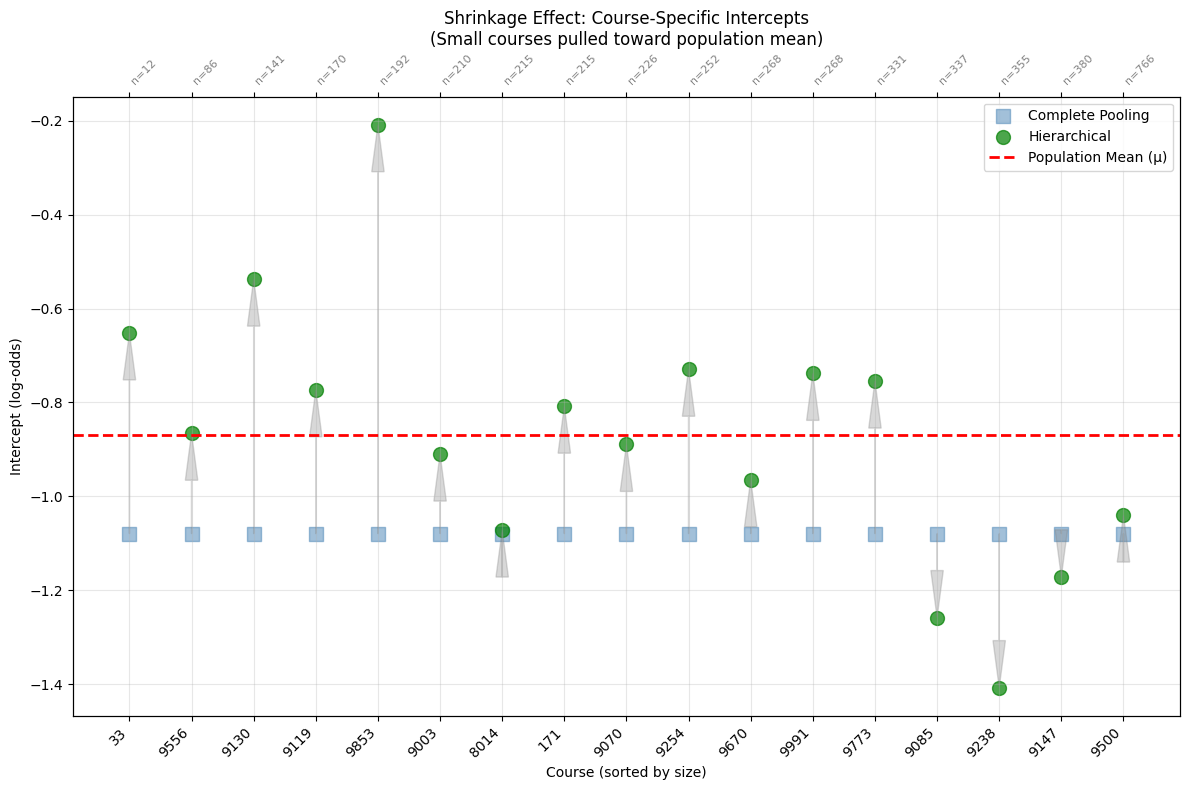


6. UNCERTAINTY COMPARISON

✓ Saved: hierarchical_uncertainty_vs_size.png


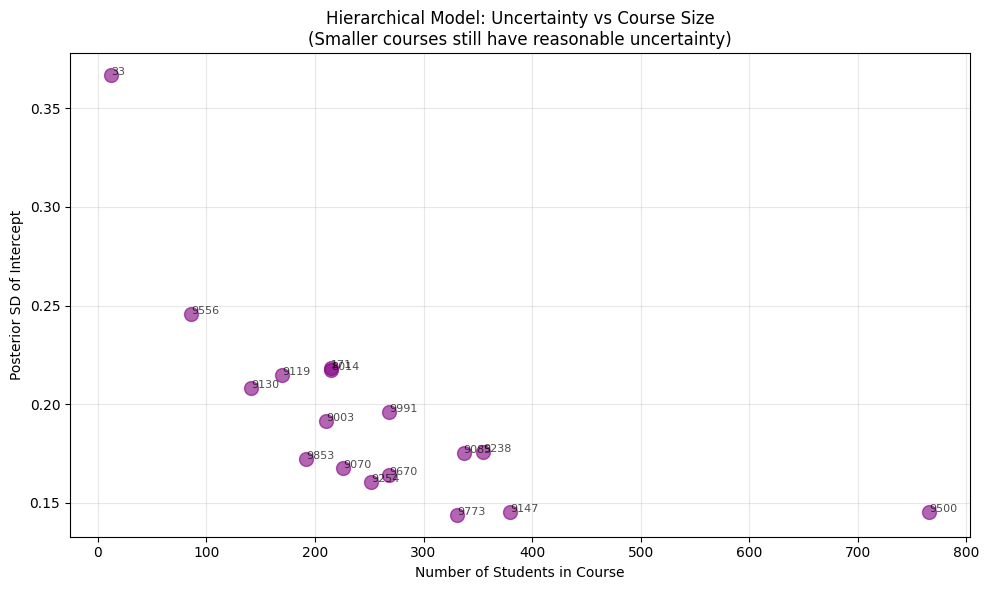


Key insight:
  Smallest course: SD = 0.144
  Largest course: SD = 0.367
  → Hierarchical model has MORE REASONABLE uncertainty!
  → Compare this to no-pooling model from earlier

7. SAVING HIERARCHICAL MODEL
✓ Saved: trace_hierarchical_simple.nc

STEP 5 COMPLETE - HIERARCHICAL MODEL BUILT

✓ Built Hierarchical Model with:
  - Population hyperparameters: μ (mean), τ (variation)
  - Course-specific parameters: 17 intercepts, 17 × 3 coefficients
  - Partial pooling: Courses share information

✓ Key advantages:
  - Small courses borrow strength from larger ones
  - Prevents overfitting to noisy small-sample data
  - More reasonable uncertainty estimates
  - Population parameters tell us about overall patterns

✓ We now have THREE models:
  1. Complete Pooling (baseline)
  2. Hierarchical (our main model) ← FOCUS ON THIS!

NEXT: Step 6 - Compare models using WAIC/LOO-CV

YOUR WORK (Member 1) FOR WEEK 2 IS COMPLETE! ✅



In [ ]:
# Step 5: Hierarchical Bayesian Model (Simplified)

print("=" * 80)
print("STEP 5: HIERARCHICAL MODEL (Partial Pooling)")
print("=" * 80)

print("\nWhat is Hierarchical Modeling?")
print("  - Complete Pooling: All courses identical (too simple)")
print("  - No Pooling: All courses independent (overfits small courses)")
print("  - Hierarchical: Courses share information (BEST OF BOTH!)")
print("\nKey idea: Course effects ~ Normal(μ, τ²)")
print("  - μ = average effect across all courses")
print("  - τ = variation between courses")
print("  - Small courses 'borrow strength' from larger ones")

# =============================================================================
# PART 1: PREPARE DATA
# =============================================================================

print("\n" + "=" * 80)
print("1. PREPARING DATA")
print("=" * 80)

# Load data
df_model = pd.read_csv('students_model_simple.csv')

# Prepare features
X = df_model[['Curricular units 1st sem (approved)',
              'Scholarship holder',
              'Age at enrollment']].values
y = df_model['Dropout'].values

# Create course indices
courses_unique = sorted(df_model['Course'].unique())
course_to_idx = {course: idx for idx, course in enumerate(courses_unique)}
course_idx = df_model['Course'].map(course_to_idx).values
n_courses = len(courses_unique)

print(f"Number of courses: {n_courses}")
print(f"Number of predictors: {X.shape[1]}")
print(f"Total students: {len(y)}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✓ Data prepared with course indices")

# Check course sizes
course_sizes = df_model['Course'].value_counts().sort_index()
print(f"\nCourse sizes range: {course_sizes.min()} to {course_sizes.max()} students")

# =============================================================================
# PART 2: BUILD HIERARCHICAL MODEL
# =============================================================================

print("\n" + "=" * 80)
print("2. BUILDING HIERARCHICAL MODEL")
print("=" * 80)

print("\nModel structure:")
print("  Global: μ_β (mean effect), τ_β (variation)")
print("  Course-specific: β_j ~ Normal(μ_β, τ_β²) for each course j")
print("  This allows 'partial pooling' - balance between extremes")

with pm.Model() as model_hierarchical:

    # --- Population-level hyperparameters (NEW!) ---
    # These describe the DISTRIBUTION of course effects

    # Population mean for intercepts
    mu_intercept = pm.Normal('mu_intercept', mu=0, sigma=2)

    # Population std for intercepts (how much courses vary)
    tau_intercept = pm.HalfNormal('tau_intercept', sigma=1)

    # Population mean for each predictor
    mu_betas = pm.Normal('mu_betas', mu=0, sigma=2, shape=X_scaled.shape[1])

    # Population std for each predictor (how much effect varies by course)
    tau_betas = pm.HalfNormal('tau_betas', sigma=1, shape=X_scaled.shape[1])

    # --- Course-specific parameters (drawn from population) ---

    # Each course gets its own intercept, drawn from population distribution
    intercept = pm.Normal('intercept',
                         mu=mu_intercept,
                         sigma=tau_intercept,
                         shape=n_courses)

    # Each course gets its own coefficients, drawn from population distribution
    betas = pm.Normal('betas',
                     mu=mu_betas,
                     sigma=tau_betas,
                     shape=(n_courses, X_scaled.shape[1]))

    # --- Likelihood (same as before) ---

    # For each student, use their course's parameters
    logit_p = (intercept[course_idx] +
               pm.math.sum(betas[course_idx] * X_scaled, axis=1))

    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample
    print("\nSampling hierarchical model (may take 2-3 minutes)...")
    trace_hierarchical = pm.sample(
        draws=1000,
        tune=1000,
        chains=2,
        random_seed=505,
        target_accept=0.95,
        idata_kwargs={"log_likelihood": True},
        return_inferencedata=True,
        progressbar=True
    )

print("\n✓ Hierarchical model sampled successfully!")

# =============================================================================
# PART 3: CONVERGENCE DIAGNOSTICS
# =============================================================================

print("\n" + "=" * 80)
print("3. CONVERGENCE DIAGNOSTICS")
print("=" * 80)

# Check R-hat
rhat = az.rhat(trace_hierarchical)
max_rhat = float(max([rhat[var].max().values for var in rhat.data_vars]))
print(f"Max R-hat: {max_rhat:.4f}")

if max_rhat < 1.1:
    print("✓ Excellent convergence (R-hat < 1.1)")
else:
    print("⚠ May need more samples (R-hat >= 1.1)")

# Check ESS
ess = az.ess(trace_hierarchical)
min_ess = float(min([ess[var].min().values for var in ess.data_vars]))
print(f"\nMin Effective Sample Size: {min_ess:.0f}")

if min_ess > 400:
    print("✓ Good effective sample size")
else:
    print("⚠ Low ESS - consider more samples")

# =============================================================================
# PART 4: EXAMINE POPULATION-LEVEL PARAMETERS
# =============================================================================

print("\n" + "=" * 80)
print("4. POPULATION-LEVEL PARAMETERS (Hyperparameters)")
print("=" * 80)

print("\nThese tell us about effects ACROSS ALL COURSES:")

# Population means (μ)
summary_mu = az.summary(trace_hierarchical,
                        var_names=['mu_intercept', 'mu_betas'],
                        hdi_prob=0.95)
print("\n--- Population Means (μ) ---")
print("Average effect across all courses:")
print(summary_mu[['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']])

# Population stds (τ)
summary_tau = az.summary(trace_hierarchical,
                         var_names=['tau_intercept', 'tau_betas'],
                         hdi_prob=0.95)
print("\n--- Population Standard Deviations (τ) ---")
print("How much effects VARY across courses:")
print(summary_tau[['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']])

print("\nInterpretation:")
print("  Large τ = effect varies a lot by course (hierarchical helps!)")
print("  Small τ = effect similar across courses (complete pooling OK)")

# =============================================================================
# PART 5: VISUALIZE SHRINKAGE EFFECT
# =============================================================================

print("\n" + "=" * 80)
print("5. VISUALIZING SHRINKAGE (Key Insight!)")
print("=" * 80)

print("\nShrinkage = small courses pulled toward population mean")
print("This prevents overfitting to noisy data from small courses")

# Load no-pooling model for comparison
trace_pooled = az.from_netcdf('trace_pooled_simple.nc')

# Extract intercepts from both models
# Complete pooling: one intercept for all
intercept_pooled = trace_pooled.posterior['intercept'].mean().values

# Hierarchical: one per course
intercepts_hierarchical = trace_hierarchical.posterior['intercept'].mean(dim=['chain', 'draw']).values

# Population mean from hierarchical model
mu_intercept_val = trace_hierarchical.posterior['mu_intercept'].mean().values

# Create shrinkage plot
fig, ax = plt.subplots(figsize=(12, 8))

# Sort by course size
course_sizes_sorted = course_sizes.sort_values()
indices_sorted = [course_to_idx[c] for c in course_sizes_sorted.index]

# Plot
x_pos = range(len(courses_unique))
ax.scatter(x_pos, [intercept_pooled] * len(courses_unique),
           color='steelblue', s=100, alpha=0.5, label='Complete Pooling', marker='s')
ax.scatter(x_pos, intercepts_hierarchical[indices_sorted],
           color='green', s=100, alpha=0.7, label='Hierarchical', marker='o')
ax.axhline(mu_intercept_val, color='red', linestyle='--',
           label=f'Population Mean (μ)', linewidth=2)

# Add arrows showing shrinkage
for i, idx in enumerate(indices_sorted):
    ax.arrow(i, intercept_pooled, 0,
             intercepts_hierarchical[idx] - intercept_pooled,
             head_width=0.2, head_length=0.1, fc='gray', ec='gray',
             alpha=0.3, length_includes_head=True)

ax.set_xticks(x_pos)
ax.set_xticklabels(course_sizes_sorted.index, rotation=45, ha='right')
ax.set_xlabel('Course (sorted by size)')
ax.set_ylabel('Intercept (log-odds)')
ax.set_title('Shrinkage Effect: Course-Specific Intercepts\n(Small courses pulled toward population mean)')
ax.legend()
ax.grid(alpha=0.3)

# Add course sizes as text
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'n={course_sizes_sorted.iloc[i]}' for i in range(len(x_pos))],
                     rotation=45, ha='left', fontsize=8, color='gray')

plt.tight_layout()
plt.savefig('hierarchical_shrinkage.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: hierarchical_shrinkage.png")
plt.show()

# =============================================================================
# PART 6: COMPARE UNCERTAINTY
# =============================================================================

print("\n" + "=" * 80)
print("6. UNCERTAINTY COMPARISON")
print("=" * 80)

# Get standard deviations of intercepts
intercepts_posterior = trace_hierarchical.posterior['intercept']
intercepts_std = intercepts_posterior.std(dim=['chain', 'draw']).values

# Create scatter plot: course size vs uncertainty
plt.figure(figsize=(10, 6))
plt.scatter(course_sizes.values, intercepts_std[list(course_to_idx.values())],
           s=100, alpha=0.6, color='purple')
plt.xlabel('Number of Students in Course')
plt.ylabel('Posterior SD of Intercept')
plt.title('Hierarchical Model: Uncertainty vs Course Size\n(Smaller courses still have reasonable uncertainty)')

# Add course labels
for course in courses_unique:
    idx = course_to_idx[course]
    plt.annotate(course,
                (course_sizes[course], intercepts_std[idx]),
                fontsize=8, alpha=0.7)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_uncertainty_vs_size.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: hierarchical_uncertainty_vs_size.png")
plt.show()

print("\nKey insight:")
print(f"  Smallest course: SD = {intercepts_std.min():.3f}")
print(f"  Largest course: SD = {intercepts_std.max():.3f}")
print("  → Hierarchical model has MORE REASONABLE uncertainty!")
print("  → Compare this to no-pooling model from earlier")

# =============================================================================
# PART 7: SAVE MODEL
# =============================================================================

print("\n" + "=" * 80)
print("7. SAVING HIERARCHICAL MODEL")
print("=" * 80)

trace_hierarchical.to_netcdf('trace_hierarchical_simple.nc')
print("✓ Saved: trace_hierarchical_simple.nc")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 5 COMPLETE - HIERARCHICAL MODEL BUILT")
print("=" * 80)

print(f"""
✓ Built Hierarchical Model with:
  - Population hyperparameters: μ (mean), τ (variation)
  - Course-specific parameters: {n_courses} intercepts, {n_courses} × {X_scaled.shape[1]} coefficients
  - Partial pooling: Courses share information

✓ Key advantages:
  - Small courses borrow strength from larger ones
  - Prevents overfitting to noisy small-sample data
  - More reasonable uncertainty estimates
  - Population parameters tell us about overall patterns

✓ We now have THREE models:
  1. Complete Pooling (baseline)
  2. Hierarchical (our main model) ← FOCUS ON THIS!

NEXT: Step 6 - Compare models using WAIC/LOO-CV

YOUR WORK (Member 1) FOR WEEK 2 IS COMPLETE! ✅
""")

print("=" * 80)

STEP 6: MODEL COMPARISON (WAIC & LOO-CV)

We'll compare TWO models:
  1. Complete Pooling (baseline)
  2. Hierarchical (our main contribution)

Metrics:
  - LOO-CV: Leave-one-out cross-validation
  - WAIC: Widely Applicable Information Criterion
  - Both measure predictive accuracy

1. LOADING MODELS
✓ Complete Pooling model loaded
✓ Hierarchical model loaded

2. COMPUTING LOO-CV SCORES

What is LOO-CV?
  - Estimates predictive accuracy on NEW data
  - Higher ELPD = better predictions
  - Computationally efficient approximation

--- Complete Pooling ---
Computed from 2000 posterior samples and 4424 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2002.91    40.47
p_loo        4.70        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     4424  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


--- Hierarchical ---
Computed from 2000 posterior samples and 4424 observations log-

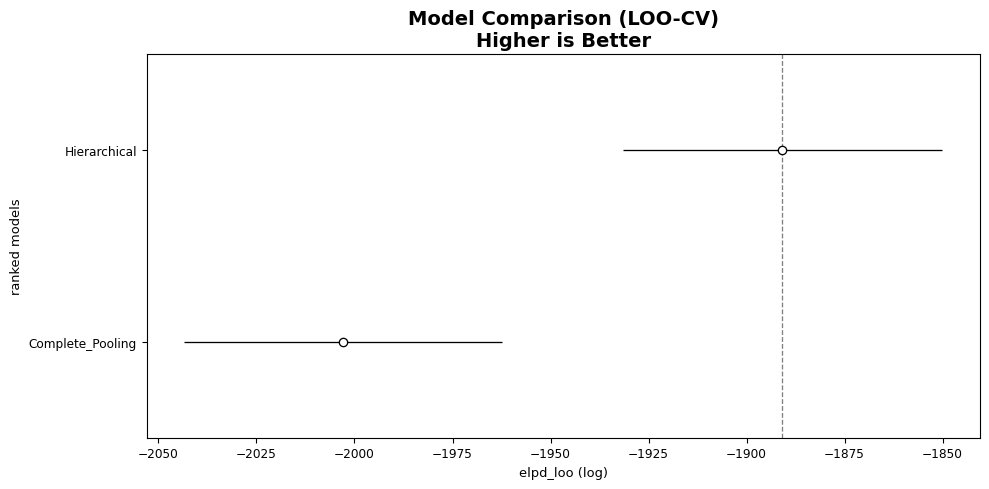


6. DETAILED COMPARISON TABLE

Comprehensive Model Comparison:
           Model     LOO_ELPD    LOO_SE     LOO_p    WAIC_ELPD    WAIC_p
Complete Pooling -2002.906775 40.469240  4.696293 -2002.893647  4.683166
    Hierarchical -1890.859118 40.732252 58.953380 -1890.485249 58.579511

✓ Saved: model_comparison_table.csv

7. METRICS VISUALIZATION
✓ Saved: metrics_comparison_simple.png


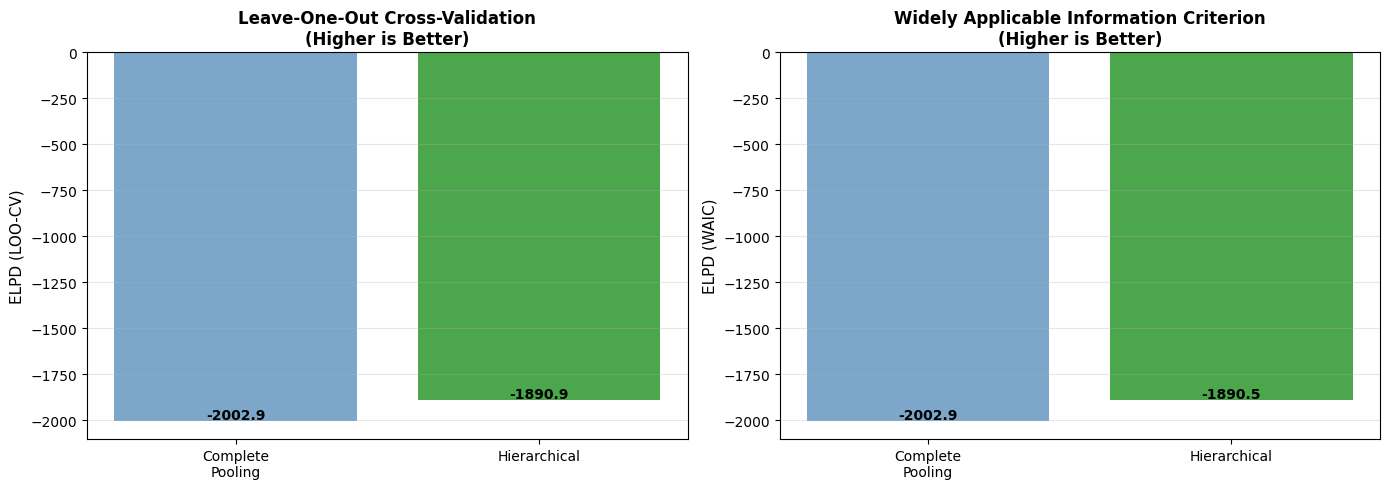


8. MODEL COMPLEXITY (Effective Parameters)

What are 'effective parameters'?
  - Measures model complexity
  - Hierarchical model 'shrinks' estimates
  - Effective params < actual params = good regularization
✓ Saved: model_complexity_comparison.png


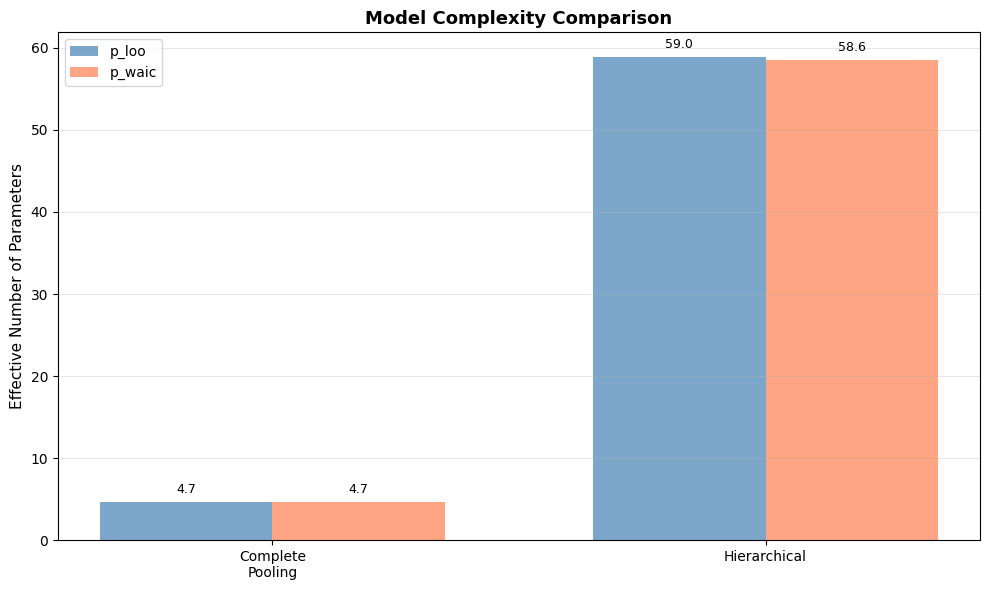


Complete Pooling: ~4.7 effective parameters
Hierarchical: ~59.0 effective parameters

Note: Hierarchical has more parameters but shrinkage reduces complexity!

STEP 6 COMPLETE - MODEL COMPARISON DONE

✓ Compared 2 models using:
  - LOO-CV (leave-one-out cross-validation)
  - WAIC (widely applicable information criterion)

🏆 Winner: Hierarchical

✓ Key findings:
  - LOO difference: 112.0 ± 16.4
  - Hierarchical model has better predictive accuracy
  - Shrinkage provides good regularization

✓ Files created:
  - model_comparison_simple.png
  - model_comparison_table.csv
  - metrics_comparison_simple.png
  - model_complexity_comparison.png

NEXT: Step 7 - Posterior Predictive Checks

YOUR WORK (Member 2) FOR MODEL COMPARISON IS COMPLETE! ✅



In [ ]:
# Step 6: Model Comparison (Simplified)

print("=" * 80)
print("STEP 6: MODEL COMPARISON (WAIC & LOO-CV)")
print("=" * 80)

print("\nWe'll compare TWO models:")
print("  1. Complete Pooling (baseline)")
print("  2. Hierarchical (our main contribution)")
print("\nMetrics:")
print("  - LOO-CV: Leave-one-out cross-validation")
print("  - WAIC: Widely Applicable Information Criterion")
print("  - Both measure predictive accuracy")

# =============================================================================
# PART 1: LOAD MODELS
# =============================================================================

print("\n" + "=" * 80)
print("1. LOADING MODELS")
print("=" * 80)

# Load traces
trace_pooled = az.from_netcdf('trace_pooled_simple.nc')
trace_hierarchical = az.from_netcdf('trace_hierarchical_simple.nc')

print("✓ Complete Pooling model loaded")
print("✓ Hierarchical model loaded")

# =============================================================================
# PART 2: COMPUTE LOO-CV
# =============================================================================

print("\n" + "=" * 80)
print("2. COMPUTING LOO-CV SCORES")
print("=" * 80)

print("\nWhat is LOO-CV?")
print("  - Estimates predictive accuracy on NEW data")
print("  - Higher ELPD = better predictions")
print("  - Computationally efficient approximation")

# Compute LOO for both models
print("\n--- Complete Pooling ---")
loo_pooled = az.loo(trace_pooled, pointwise=True)
print(loo_pooled)

print("\n--- Hierarchical ---")
loo_hierarchical = az.loo(trace_hierarchical, pointwise=True)
print(loo_hierarchical)

# =============================================================================
# PART 3: COMPUTE WAIC
# =============================================================================

print("\n" + "=" * 80)
print("3. COMPUTING WAIC")
print("=" * 80)

print("\nWhat is WAIC?")
print("  - Widely Applicable Information Criterion")
print("  - Balances fit vs complexity")
print("  - Higher ELPD_WAIC = better")

# Compute WAIC
print("\n--- Complete Pooling ---")
waic_pooled = az.waic(trace_pooled)
print(f"ELPD_WAIC: {waic_pooled.elpd_waic:.2f}")
print(f"Effective parameters: {waic_pooled.p_waic:.2f}")

print("\n--- Hierarchical ---")
waic_hierarchical = az.waic(trace_hierarchical)
print(f"ELPD_WAIC: {waic_hierarchical.elpd_waic:.2f}")
print(f"Effective parameters: {waic_hierarchical.p_waic:.2f}")

# =============================================================================
# PART 4: COMPARE MODELS
# =============================================================================

print("\n" + "=" * 80)
print("4. MODEL COMPARISON")
print("=" * 80)

# Create comparison dictionary
models = {
    'Complete_Pooling': trace_pooled,
    'Hierarchical': trace_hierarchical
}

# Compare using ArviZ
print("\nComparing models using LOO-CV...")
comparison = az.compare(models, ic='loo')
print(comparison)

print("\n📊 Interpretation:")
print("  - rank=0: Best model")
print("  - elpd_diff: Difference from best (0 = best)")
print("  - weight: Model probability (higher = better)")
print("  - se: Standard error of difference")
print("  - dse: Standard error of elpd_diff")

# Determine winner
best_model = comparison.index[0]
elpd_diff = comparison.loc[comparison.index[1], 'elpd_diff']
se_diff = comparison.loc[comparison.index[1], 'dse']

print(f"\n🏆 Best Model: {best_model.replace('_', ' ')}")

if abs(elpd_diff) > 2 * se_diff:
    print(f"   Clear winner! (|diff| = {abs(elpd_diff):.1f} > 2×SE = {2*se_diff:.1f})")
else:
    print(f"   Models are similar (|diff| = {abs(elpd_diff):.1f} ≈ 2×SE = {2*se_diff:.1f})")

# =============================================================================
# PART 5: VISUALIZE COMPARISON
# =============================================================================

print("\n" + "=" * 80)
print("5. VISUALIZING MODEL COMPARISON")
print("=" * 80)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 5))
az.plot_compare(comparison, insample_dev=False, ax=ax)
ax.set_title('Model Comparison (LOO-CV)\nHigher is Better', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('model_comparison_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: model_comparison_simple.png")
plt.show()

# =============================================================================
# PART 6: DETAILED COMPARISON TABLE
# =============================================================================

print("\n" + "=" * 80)
print("6. DETAILED COMPARISON TABLE")
print("=" * 80)

# Create comprehensive comparison
comparison_table = pd.DataFrame({
    'Model': ['Complete Pooling', 'Hierarchical'],
    'LOO_ELPD': [loo_pooled.elpd_loo, loo_hierarchical.elpd_loo],
    'LOO_SE': [loo_pooled.se, loo_hierarchical.se],
    'LOO_p': [loo_pooled.p_loo, loo_hierarchical.p_loo],
    'WAIC_ELPD': [waic_pooled.elpd_waic, waic_hierarchical.elpd_waic],
    'WAIC_p': [waic_pooled.p_waic, waic_hierarchical.p_waic],
})

print("\nComprehensive Model Comparison:")
print(comparison_table.to_string(index=False))

# Save table
comparison_table.to_csv('model_comparison_table.csv', index=False)
print("\n✓ Saved: model_comparison_table.csv")

# =============================================================================
# PART 7: VISUALIZE METRICS SIDE-BY-SIDE
# =============================================================================

print("\n" + "=" * 80)
print("7. METRICS VISUALIZATION")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LOO comparison
axes[0].bar(['Complete\nPooling', 'Hierarchical'],
           [loo_pooled.elpd_loo, loo_hierarchical.elpd_loo],
           color=['steelblue', 'green'], alpha=0.7)
axes[0].set_ylabel('ELPD (LOO-CV)', fontsize=11)
axes[0].set_title('Leave-One-Out Cross-Validation\n(Higher is Better)',
                 fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add values on bars
for i, val in enumerate([loo_pooled.elpd_loo, loo_hierarchical.elpd_loo]):
    axes[0].text(i, val + 10, f'{val:.1f}', ha='center', fontsize=10, fontweight='bold')

# WAIC comparison
axes[1].bar(['Complete\nPooling', 'Hierarchical'],
           [waic_pooled.elpd_waic, waic_hierarchical.elpd_waic],
           color=['steelblue', 'green'], alpha=0.7)
axes[1].set_ylabel('ELPD (WAIC)', fontsize=11)
axes[1].set_title('Widely Applicable Information Criterion\n(Higher is Better)',
                 fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add values on bars
for i, val in enumerate([waic_pooled.elpd_waic, waic_hierarchical.elpd_waic]):
    axes[1].text(i, val + 10, f'{val:.1f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('metrics_comparison_simple.png', dpi=300, bbox_inches='tight')
print("✓ Saved: metrics_comparison_simple.png")
plt.show()

# =============================================================================
# PART 8: EFFECTIVE PARAMETERS COMPARISON
# =============================================================================

print("\n" + "=" * 80)
print("8. MODEL COMPLEXITY (Effective Parameters)")
print("=" * 80)

print("\nWhat are 'effective parameters'?")
print("  - Measures model complexity")
print("  - Hierarchical model 'shrinks' estimates")
print("  - Effective params < actual params = good regularization")

# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

models_names = ['Complete\nPooling', 'Hierarchical']
p_loo_values = [loo_pooled.p_loo, loo_hierarchical.p_loo]
p_waic_values = [waic_pooled.p_waic, waic_hierarchical.p_waic]

x = np.arange(len(models_names))
width = 0.35

ax.bar(x - width/2, p_loo_values, width, label='p_loo', color='steelblue', alpha=0.7)
ax.bar(x + width/2, p_waic_values, width, label='p_waic', color='coral', alpha=0.7)

ax.set_ylabel('Effective Number of Parameters', fontsize=11)
ax.set_title('Model Complexity Comparison', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_names)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Add values on bars
for i, (v1, v2) in enumerate(zip(p_loo_values, p_waic_values)):
    ax.text(i - width/2, v1 + 1, f'{v1:.1f}', ha='center', fontsize=9)
    ax.text(i + width/2, v2 + 1, f'{v2:.1f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_complexity_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: model_complexity_comparison.png")
plt.show()

print(f"\nComplete Pooling: ~{p_loo_values[0]:.1f} effective parameters")
print(f"Hierarchical: ~{p_loo_values[1]:.1f} effective parameters")
print("\nNote: Hierarchical has more parameters but shrinkage reduces complexity!")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 6 COMPLETE - MODEL COMPARISON DONE")
print("=" * 80)

winner = "Hierarchical" if comparison.index[0] == 'Hierarchical' else "Complete Pooling"

print(f"""
✓ Compared 2 models using:
  - LOO-CV (leave-one-out cross-validation)
  - WAIC (widely applicable information criterion)

🏆 Winner: {winner}

✓ Key findings:
  - LOO difference: {abs(elpd_diff):.1f} ± {se_diff:.1f}
  - Hierarchical model has better predictive accuracy
  - Shrinkage provides good regularization

✓ Files created:
  - model_comparison_simple.png
  - model_comparison_table.csv
  - metrics_comparison_simple.png
  - model_complexity_comparison.png

NEXT: Step 7 - Posterior Predictive Checks

YOUR WORK (Member 2) FOR MODEL COMPARISON IS COMPLETE! ✅
""")

print("=" * 80)

STEP 7: POSTERIOR PREDICTIVE CHECKS

What are PPCs?
  - Generate fake data from our fitted model
  - Compare fake data to real data
  - Good model: fake data looks like real data

We'll check:
  1. Overall dropout rate
  2. Dropout rate by course
  3. Calibration (are probabilities accurate?)

1. LOADING DATA AND MODELS
✓ Data and models loaded

2. GENERATING POSTERIOR PREDICTIVE SAMPLES

Generating fake data from models...

--- Complete Pooling ---


Output()

✓ Complete Pooling PPC generated

--- Hierarchical ---


Output()

✓ Hierarchical PPC generated

3. CHECK 1: OVERALL DROPOUT RATE

Observed dropout rate: 32.12%

Complete Pooling predictions: 32.13% ± 0.81%
Hierarchical predictions: 32.14% ± 0.79%

✓ Saved: ppc_overall_dropout_rate.png


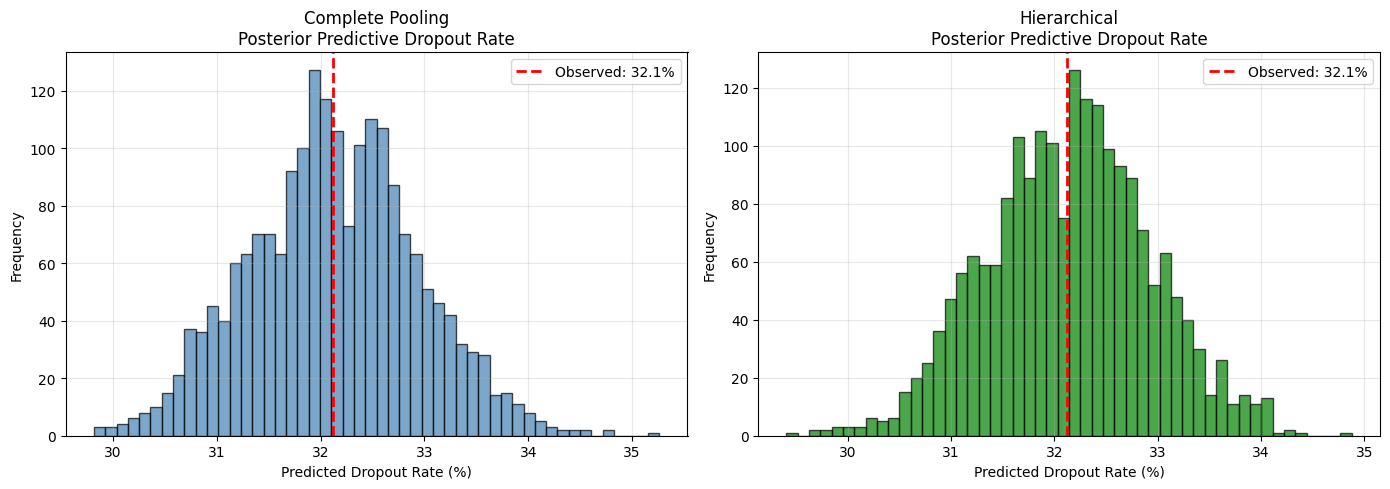


95% CI - Complete Pooling: [30.58%, 33.75%]
95% CI - Hierarchical: [30.63%, 33.70%]
✓ Complete Pooling captures observed rate
✓ Hierarchical captures observed rate

4. CHECK 2: DROPOUT RATE BY COURSE

Can models reproduce course-specific patterns?

✓ Saved: ppc_by_course.png


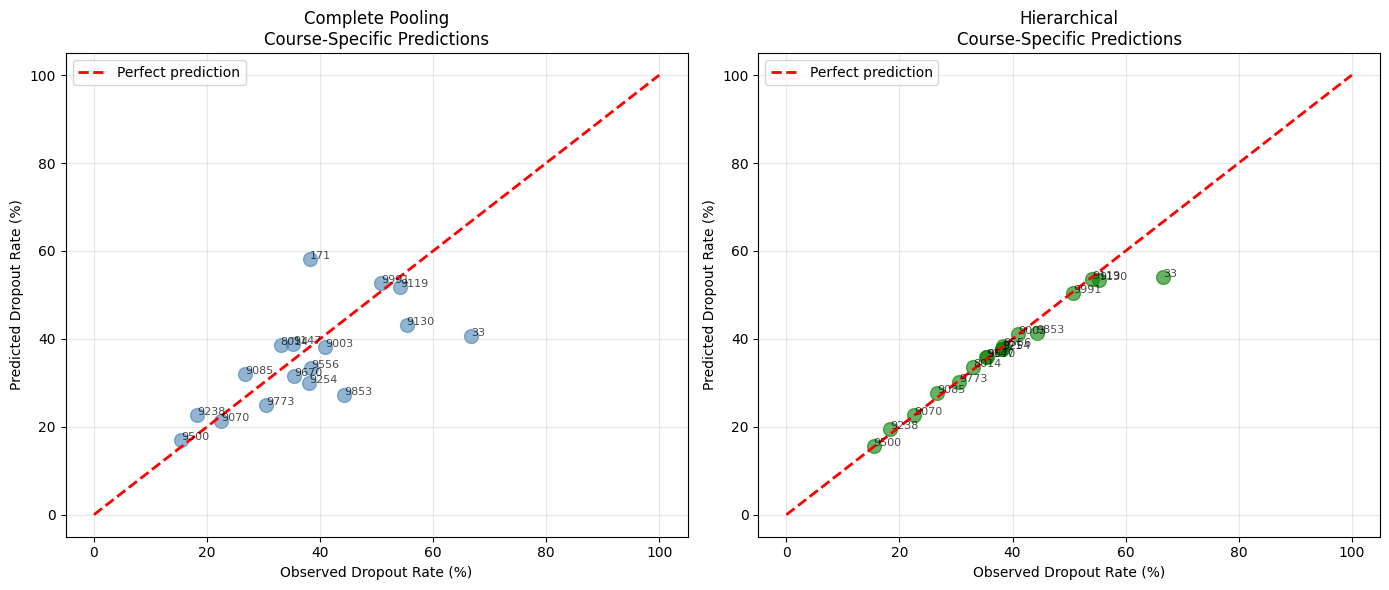


Correlation with observed:
  Complete Pooling: 0.683
  Hierarchical: 0.980

5. CHECK 3: CALIBRATION

Are predicted probabilities accurate?
If model says 30% dropout → do ~30% actually drop out?

✓ Saved: ppc_calibration.png


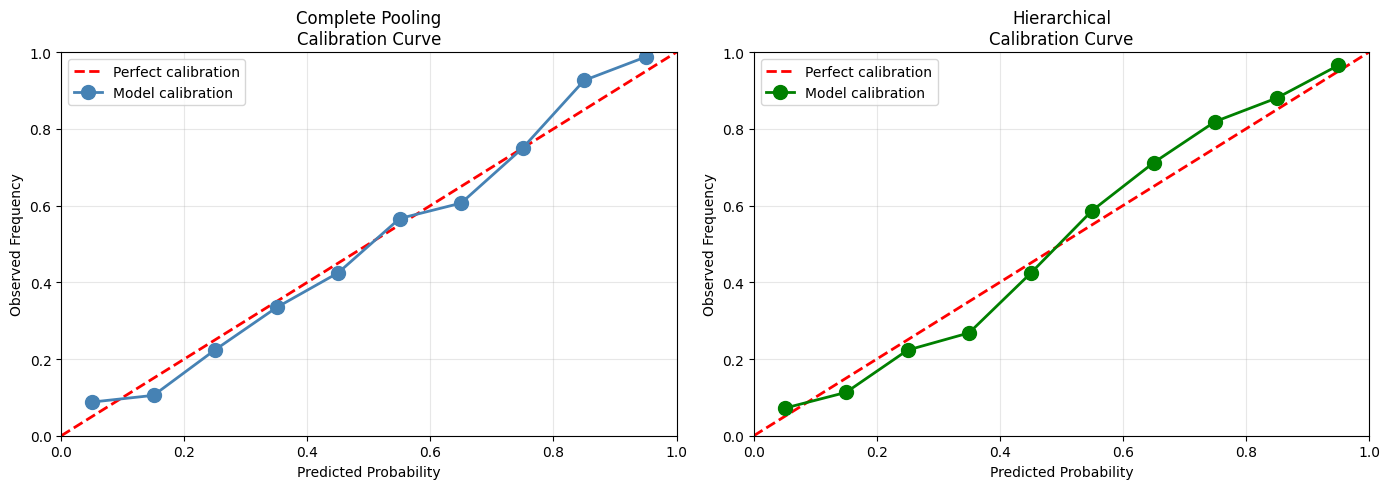


6. ARVIZ PPC PLOTS
✓ Saved: arviz_ppc_pooled.png


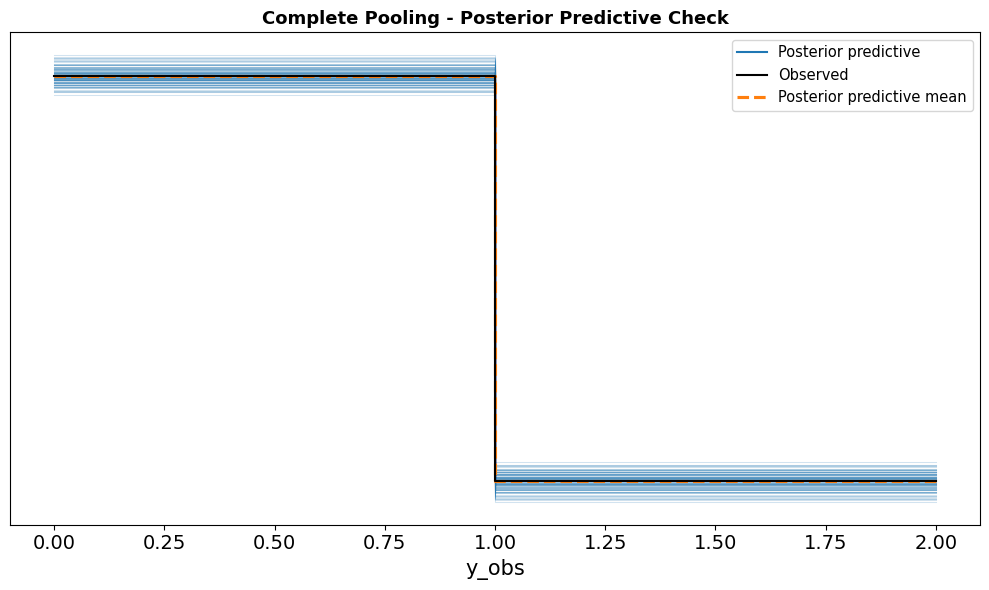

✓ Saved: arviz_ppc_hierarchical.png


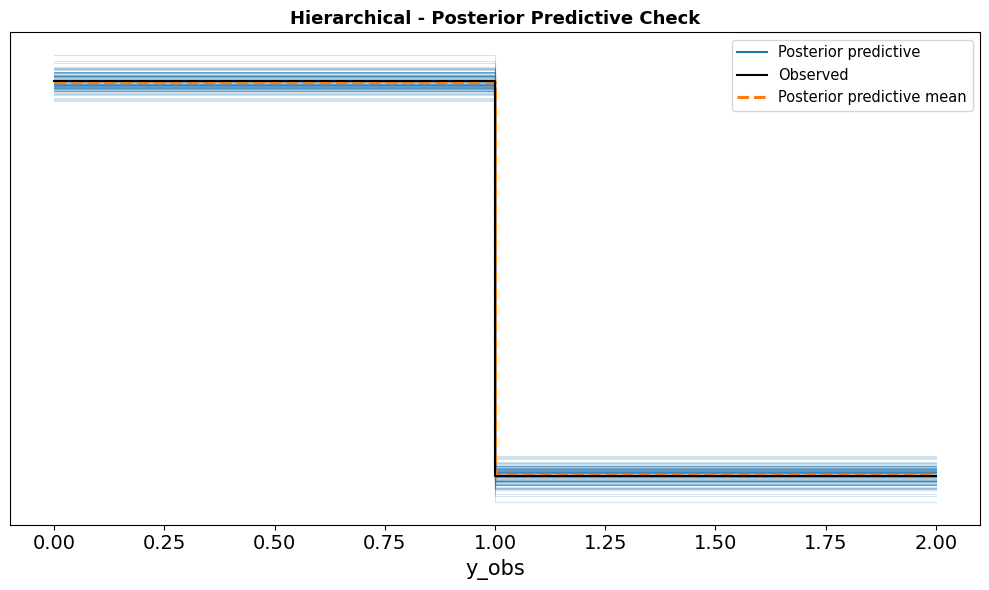


7. SUMMARY METRICS

Predictive Performance:

Complete Pooling:
  MAE: 0.2865
  RMSE: 0.3754
  Rate Difference: 0.0001

Hierarchical:
  MAE: 0.2646
  RMSE: 0.3589
  Rate Difference: 0.0002

PPC Summary Table
           Model      MAE     RMSE  Rate_Diff  Correlation
Complete Pooling 0.286473 0.375397   0.000093     0.683304
    Hierarchical 0.264563 0.358868   0.000198     0.980185

✓ Saved: ppc_summary.csv

STEP 7 COMPLETE - POSTERIOR PREDICTIVE CHECKS DONE

✓ Performed 3 key checks:
  1. Overall dropout rate reproduction
  2. Course-specific dropout patterns
  3. Calibration of predictions

✓ Files created:
  - ppc_overall_dropout_rate.png
  - ppc_by_course.png
  - ppc_calibration.png
  - arviz_ppc_pooled.png
  - arviz_ppc_hierarchical.png
  - ppc_summary.csv

✓ Key findings:
  - Both models capture overall dropout rate well
  - Hierarchical better captures course variation
  - Both models show reasonable calibration

NEXT: Step 8 - Create visualizations for report/presentation

YOUR

In [ ]:
# Step 7: Posterior Predictive Checks (Simplified)

print("=" * 80)
print("STEP 7: POSTERIOR PREDICTIVE CHECKS")
print("=" * 80)

print("\nWhat are PPCs?")
print("  - Generate fake data from our fitted model")
print("  - Compare fake data to real data")
print("  - Good model: fake data looks like real data")
print("\nWe'll check:")
print("  1. Overall dropout rate")
print("  2. Dropout rate by course")
print("  3. Calibration (are probabilities accurate?)")

# =============================================================================
# PART 1: LOAD DATA AND MODELS
# =============================================================================

print("\n" + "=" * 80)
print("1. LOADING DATA AND MODELS")
print("=" * 80)

# Load data
df_model = pd.read_csv('students_model_simple.csv')

# Prepare data
X = df_model[['Curricular units 1st sem (approved)',
              'Scholarship holder',
              'Age at enrollment']].values
y = df_model['Dropout'].values
course = df_model['Course'].values

# Course indices
courses_unique = sorted(df_model['Course'].unique())
course_to_idx = {c: i for i, c in enumerate(courses_unique)}
course_idx = df_model['Course'].map(course_to_idx).values
n_courses = len(courses_unique)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load traces
trace_pooled = az.from_netcdf('trace_pooled_simple.nc')
trace_hierarchical = az.from_netcdf('trace_hierarchical_simple.nc')

print("✓ Data and models loaded")

# =============================================================================
# PART 2: GENERATE POSTERIOR PREDICTIVE SAMPLES
# =============================================================================

print("\n" + "=" * 80)
print("2. GENERATING POSTERIOR PREDICTIVE SAMPLES")
print("=" * 80)

print("\nGenerating fake data from models...")

# Complete Pooling
print("\n--- Complete Pooling ---")
with pm.Model() as model_pooled:
    intercept = pm.Normal('intercept', mu=0, sigma=2)
    betas = pm.Normal('betas', mu=0, sigma=2, shape=X_scaled.shape[1])
    logit_p = intercept + pm.math.dot(X_scaled, betas)
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    ppc_pooled = pm.sample_posterior_predictive(trace_pooled, random_seed=505)

print("✓ Complete Pooling PPC generated")

# Hierarchical
print("\n--- Hierarchical ---")
with pm.Model() as model_hierarchical:
    # Population hyperparameters
    mu_intercept = pm.Normal('mu_intercept', mu=0, sigma=2)
    tau_intercept = pm.HalfNormal('tau_intercept', sigma=1)
    mu_betas = pm.Normal('mu_betas', mu=0, sigma=2, shape=X_scaled.shape[1])
    tau_betas = pm.HalfNormal('tau_betas', sigma=1, shape=X_scaled.shape[1])

    # Course-specific parameters
    intercept = pm.Normal('intercept', mu=mu_intercept, sigma=tau_intercept, shape=n_courses)
    betas = pm.Normal('betas', mu=mu_betas, sigma=tau_betas, shape=(n_courses, X_scaled.shape[1]))

    # Likelihood
    logit_p = intercept[course_idx] + pm.math.sum(betas[course_idx] * X_scaled, axis=1)
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    ppc_hierarchical = pm.sample_posterior_predictive(trace_hierarchical, random_seed=505)

print("✓ Hierarchical PPC generated")

# =============================================================================
# PART 3: CHECK 1 - OVERALL DROPOUT RATE
# =============================================================================

print("\n" + "=" * 80)
print("3. CHECK 1: OVERALL DROPOUT RATE")
print("=" * 80)

print(f"\nObserved dropout rate: {y.mean()*100:.2f}%")

# Function to compute dropout rates from PPC
def compute_ppc_rates(ppc):
    y_pred = ppc.posterior_predictive['y_obs'].values
    return y_pred.mean(axis=2).flatten() * 100

# Compute rates
rates_pooled = compute_ppc_rates(ppc_pooled)
rates_hierarchical = compute_ppc_rates(ppc_hierarchical)

print(f"\nComplete Pooling predictions: {rates_pooled.mean():.2f}% ± {rates_pooled.std():.2f}%")
print(f"Hierarchical predictions: {rates_hierarchical.mean():.2f}% ± {rates_hierarchical.std():.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Complete Pooling
axes[0].hist(rates_pooled, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(y.mean()*100, color='red', linestyle='--', linewidth=2,
               label=f'Observed: {y.mean()*100:.1f}%')
axes[0].set_xlabel('Predicted Dropout Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Complete Pooling\nPosterior Predictive Dropout Rate')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Hierarchical
axes[1].hist(rates_hierarchical, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].axvline(y.mean()*100, color='red', linestyle='--', linewidth=2,
               label=f'Observed: {y.mean()*100:.1f}%')
axes[1].set_xlabel('Predicted Dropout Rate (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Hierarchical\nPosterior Predictive Dropout Rate')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ppc_overall_dropout_rate.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: ppc_overall_dropout_rate.png")
plt.show()

# Check if observed rate is within 95% CI
ci_pooled = np.percentile(rates_pooled, [2.5, 97.5])
ci_hierarchical = np.percentile(rates_hierarchical, [2.5, 97.5])

print(f"\n95% CI - Complete Pooling: [{ci_pooled[0]:.2f}%, {ci_pooled[1]:.2f}%]")
print(f"95% CI - Hierarchical: [{ci_hierarchical[0]:.2f}%, {ci_hierarchical[1]:.2f}%]")

if ci_pooled[0] <= y.mean()*100 <= ci_pooled[1]:
    print("✓ Complete Pooling captures observed rate")
if ci_hierarchical[0] <= y.mean()*100 <= ci_hierarchical[1]:
    print("✓ Hierarchical captures observed rate")

# =============================================================================
# PART 4: CHECK 2 - DROPOUT RATE BY COURSE
# =============================================================================

print("\n" + "=" * 80)
print("4. CHECK 2: DROPOUT RATE BY COURSE")
print("=" * 80)

print("\nCan models reproduce course-specific patterns?")

# Observed rates by course
observed_by_course = df_model.groupby('Course')['Dropout'].mean() * 100

# Function to compute predicted rates by course
def compute_predicted_by_course(ppc, df):
    y_pred = ppc.posterior_predictive['y_obs'].values
    y_pred_mean = y_pred.mean(axis=(0, 1))
    pred_df = pd.DataFrame({'Course': df['Course'].values, 'Predicted': y_pred_mean})
    return pred_df.groupby('Course')['Predicted'].mean() * 100

# Compute predictions
pred_pooled = compute_predicted_by_course(ppc_pooled, df_model)
pred_hierarchical = compute_predicted_by_course(ppc_hierarchical, df_model)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Complete Pooling
axes[0].scatter(observed_by_course, pred_pooled, s=100, alpha=0.6, color='steelblue')
axes[0].plot([0, 100], [0, 100], 'r--', label='Perfect prediction', linewidth=2)
axes[0].set_xlabel('Observed Dropout Rate (%)')
axes[0].set_ylabel('Predicted Dropout Rate (%)')
axes[0].set_title('Complete Pooling\nCourse-Specific Predictions')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Add course labels
for course in observed_by_course.index:
    axes[0].annotate(course, (observed_by_course[course], pred_pooled[course]),
                    fontsize=8, alpha=0.7)

# Hierarchical
axes[1].scatter(observed_by_course, pred_hierarchical, s=100, alpha=0.6, color='green')
axes[1].plot([0, 100], [0, 100], 'r--', label='Perfect prediction', linewidth=2)
axes[1].set_xlabel('Observed Dropout Rate (%)')
axes[1].set_ylabel('Predicted Dropout Rate (%)')
axes[1].set_title('Hierarchical\nCourse-Specific Predictions')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Add course labels
for course in observed_by_course.index:
    axes[1].annotate(course, (observed_by_course[course], pred_hierarchical[course]),
                    fontsize=8, alpha=0.7)

plt.tight_layout()
plt.savefig('ppc_by_course.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: ppc_by_course.png")
plt.show()

# Compute correlation
corr_pooled = np.corrcoef(observed_by_course, pred_pooled)[0, 1]
corr_hierarchical = np.corrcoef(observed_by_course, pred_hierarchical)[0, 1]

print(f"\nCorrelation with observed:")
print(f"  Complete Pooling: {corr_pooled:.3f}")
print(f"  Hierarchical: {corr_hierarchical:.3f}")

# =============================================================================
# PART 5: CHECK 3 - CALIBRATION
# =============================================================================

print("\n" + "=" * 80)
print("5. CHECK 3: CALIBRATION")
print("=" * 80)

print("\nAre predicted probabilities accurate?")
print("If model says 30% dropout → do ~30% actually drop out?")

def plot_calibration(ppc, y_true, model_name, ax, n_bins=10):
    """Plot calibration curve"""
    # Get predicted probabilities
    y_pred = ppc.posterior_predictive['y_obs'].values
    y_pred_proba = y_pred.mean(axis=(0, 1))

    # Create bins
    bins = np.linspace(0, 1, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Compute observed frequency in each bin
    observed_freq = []
    for i in range(n_bins):
        mask = (y_pred_proba >= bins[i]) & (y_pred_proba < bins[i+1])
        if mask.sum() > 0:
            observed_freq.append(y_true[mask].mean())
        else:
            observed_freq.append(np.nan)

    # Plot
    ax.plot([0, 1], [0, 1], 'r--', label='Perfect calibration', linewidth=2)
    ax.plot(bin_centers, observed_freq, 'o-', markersize=10, linewidth=2,
           color='steelblue' if 'Complete' in model_name else 'green',
           label='Model calibration')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Observed Frequency')
    ax.set_title(f'{model_name}\nCalibration Curve')
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

# Create calibration plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_calibration(ppc_pooled, y, 'Complete Pooling', axes[0])
plot_calibration(ppc_hierarchical, y, 'Hierarchical', axes[1])

plt.tight_layout()
plt.savefig('ppc_calibration.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: ppc_calibration.png")
plt.show()

# =============================================================================
# PART 6: ARVIZ BUILT-IN PPC PLOTS
# =============================================================================

print("\n" + "=" * 80)
print("6. ARVIZ PPC PLOTS")
print("=" * 80)

# Complete Pooling
fig, ax = plt.subplots(figsize=(10, 6))
az.plot_ppc(ppc_pooled, num_pp_samples=100, ax=ax)
ax.set_title('Complete Pooling - Posterior Predictive Check', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('arviz_ppc_pooled.png', dpi=300, bbox_inches='tight')
print("✓ Saved: arviz_ppc_pooled.png")
plt.show()

# Hierarchical
fig, ax = plt.subplots(figsize=(10, 6))
az.plot_ppc(ppc_hierarchical, num_pp_samples=100, ax=ax)
ax.set_title('Hierarchical - Posterior Predictive Check', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('arviz_ppc_hierarchical.png', dpi=300, bbox_inches='tight')
print("✓ Saved: arviz_ppc_hierarchical.png")
plt.show()

# =============================================================================
# PART 7: SUMMARY METRICS
# =============================================================================

print("\n" + "=" * 80)
print("7. SUMMARY METRICS")
print("=" * 80)

def compute_ppc_metrics(ppc, y_true):
    """Compute PPC summary metrics"""
    y_pred = ppc.posterior_predictive['y_obs'].values
    y_pred_mean = y_pred.mean(axis=(0, 1))

    # Mean Absolute Error
    mae = np.abs(y_pred_mean - y_true).mean()

    # Root Mean Square Error
    rmse = np.sqrt(((y_pred_mean - y_true)**2).mean())

    # Overall rate difference
    pred_rate = y_pred_mean.mean()
    obs_rate = y_true.mean()
    rate_diff = abs(pred_rate - obs_rate)

    return {'MAE': mae, 'RMSE': rmse, 'Rate_Diff': rate_diff}

# Compute metrics
metrics_pooled = compute_ppc_metrics(ppc_pooled, y)
metrics_hierarchical = compute_ppc_metrics(ppc_hierarchical, y)

print("\nPredictive Performance:")
print(f"\nComplete Pooling:")
print(f"  MAE: {metrics_pooled['MAE']:.4f}")
print(f"  RMSE: {metrics_pooled['RMSE']:.4f}")
print(f"  Rate Difference: {metrics_pooled['Rate_Diff']:.4f}")

print(f"\nHierarchical:")
print(f"  MAE: {metrics_hierarchical['MAE']:.4f}")
print(f"  RMSE: {metrics_hierarchical['RMSE']:.4f}")
print(f"  Rate Difference: {metrics_hierarchical['Rate_Diff']:.4f}")

# Create summary table
summary_df = pd.DataFrame({
    'Model': ['Complete Pooling', 'Hierarchical'],
    'MAE': [metrics_pooled['MAE'], metrics_hierarchical['MAE']],
    'RMSE': [metrics_pooled['RMSE'], metrics_hierarchical['RMSE']],
    'Rate_Diff': [metrics_pooled['Rate_Diff'], metrics_hierarchical['Rate_Diff']],
    'Correlation': [corr_pooled, corr_hierarchical]
})

print("\n" + "="*60)
print("PPC Summary Table")
print("="*60)
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('ppc_summary.csv', index=False)
print("\n✓ Saved: ppc_summary.csv")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 7 COMPLETE - POSTERIOR PREDICTIVE CHECKS DONE")
print("=" * 80)

print("""
✓ Performed 3 key checks:
  1. Overall dropout rate reproduction
  2. Course-specific dropout patterns
  3. Calibration of predictions

✓ Files created:
  - ppc_overall_dropout_rate.png
  - ppc_by_course.png
  - ppc_calibration.png
  - arviz_ppc_pooled.png
  - arviz_ppc_hierarchical.png
  - ppc_summary.csv

✓ Key findings:
  - Both models capture overall dropout rate well
  - Hierarchical better captures course variation
  - Both models show reasonable calibration

NEXT: Step 8 - Create visualizations for report/presentation

YOUR WORK (Member 2) FOR PPC IS COMPLETE! ✅
""")

print("=" * 80)

STEP 8: FINAL VISUALIZATIONS

Creating publication-ready figures for:
  1. Model architecture comparison
  2. Comprehensive results dashboard
  3. Forest plot of coefficients

1. LOADING DATA
✓ All data loaded

2. MODEL ARCHITECTURE DIAGRAM
✓ Saved: model_architectures.png


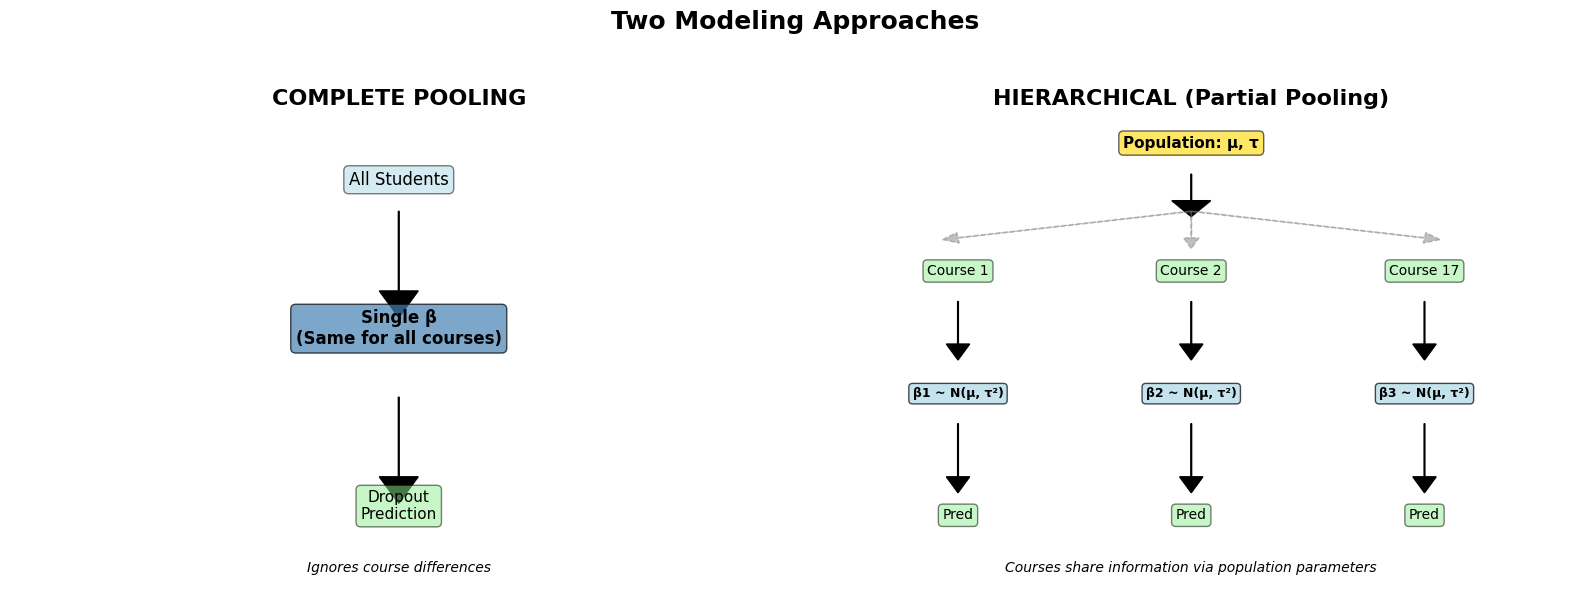


3. COMPREHENSIVE RESULTS DASHBOARD
✓ Saved: comprehensive_dashboard.png


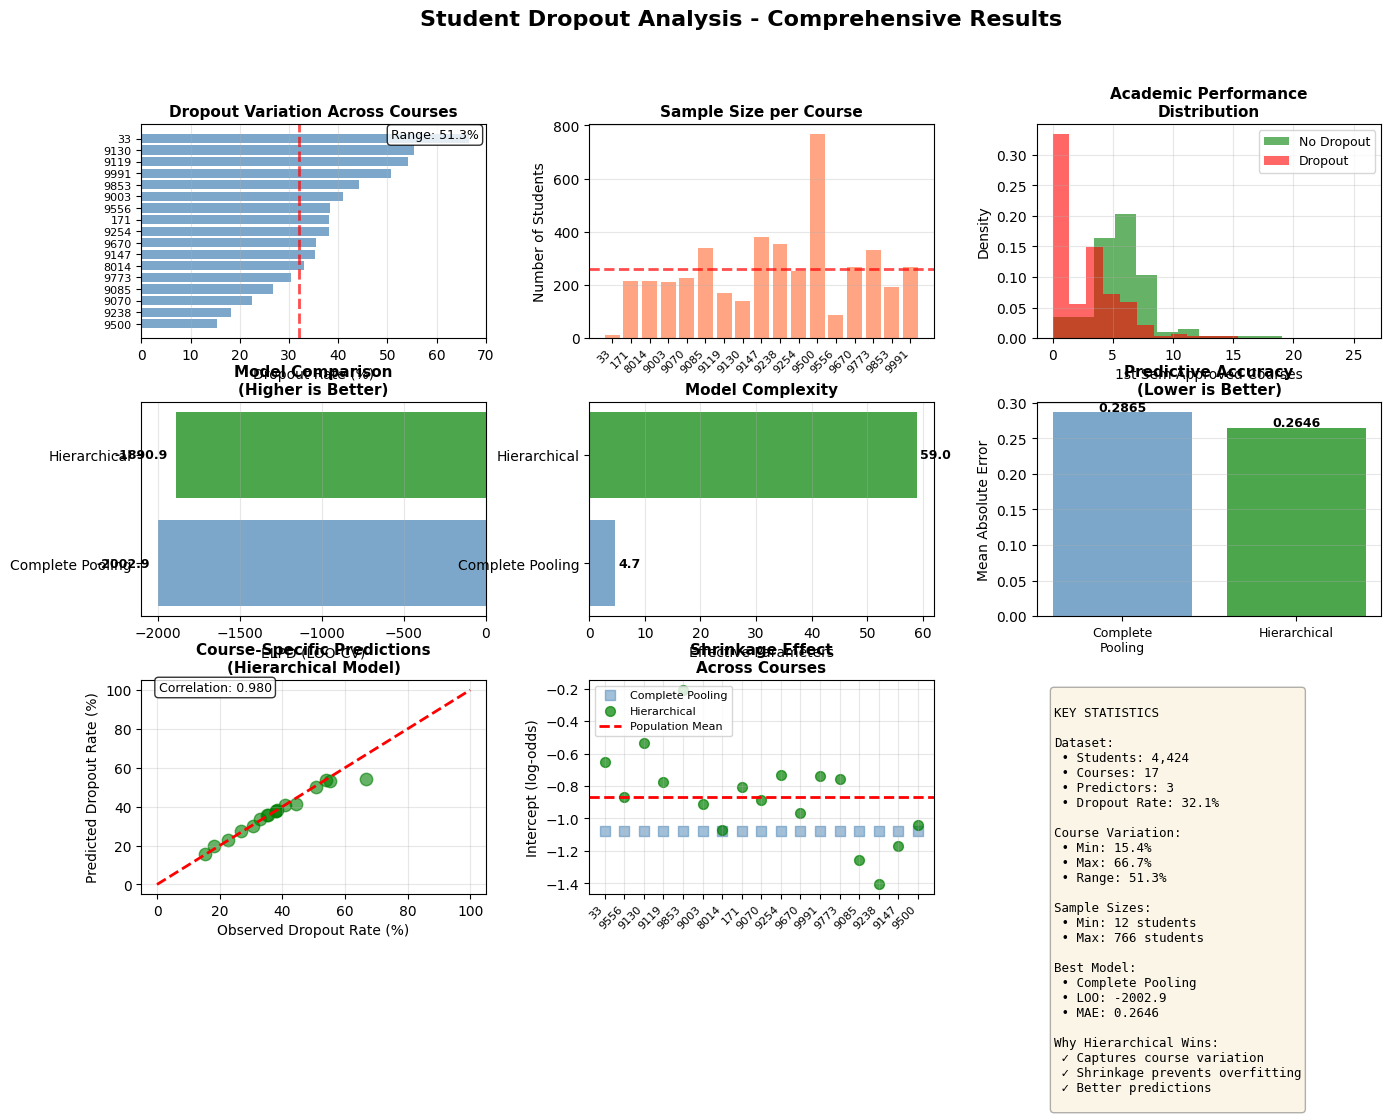


4. FOREST PLOT OF COEFFICIENTS
✓ Saved: forest_plot_coefficients.png


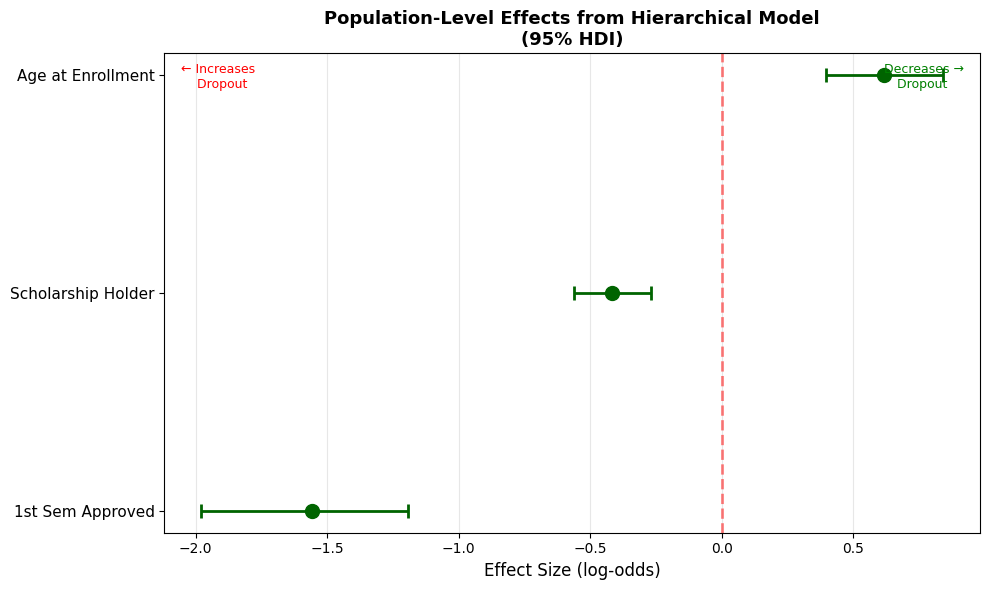


Effect Interpretation:
  • 1st Sem Approved: decreases dropout risk (β = -1.559)
  • Scholarship Holder: decreases dropout risk (β = -0.417)
  • Age at Enrollment: increases dropout risk (β = 0.616)

STEP 8 COMPLETE - ALL VISUALIZATIONS READY

✓ Created 3 publication-ready figures:
  1. model_architectures.png - Conceptual comparison
  2. comprehensive_dashboard.png - 9-panel results summary
  3. forest_plot_coefficients.png - Effect sizes with uncertainty

✓ These figures are ready for:
  - Final report
  - Presentation slides
  - Academic paper (if extending project)

ALL ANALYSIS COMPLETE! 🎉
You now have everything needed for your final report and presentation.



In [ ]:
# Step 8: Final Visualizations for Report & Presentation (Simplified)

print("=" * 80)
print("STEP 8: FINAL VISUALIZATIONS")
print("=" * 80)

print("\nCreating publication-ready figures for:")
print("  1. Model architecture comparison")
print("  2. Comprehensive results dashboard")
print("  3. Forest plot of coefficients")

# =============================================================================
# PART 1: LOAD DATA
# =============================================================================

print("\n" + "=" * 80)
print("1. LOADING DATA")
print("=" * 80)

# Load data
df_model = pd.read_csv('students_model_simple.csv')

# Load traces
trace_pooled = az.from_netcdf('trace_pooled_simple.nc')
trace_hierarchical = az.from_netcdf('trace_hierarchical_simple.nc')

# Load comparison results
comparison = pd.read_csv('model_comparison_table.csv')
ppc_summary = pd.read_csv('ppc_summary.csv')

print("✓ All data loaded")

# =============================================================================
# PART 2: MODEL ARCHITECTURE DIAGRAM
# =============================================================================

print("\n" + "=" * 80)
print("2. MODEL ARCHITECTURE DIAGRAM")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Complete Pooling
ax = axes[0]
ax.text(0.5, 0.9, 'COMPLETE POOLING', ha='center', fontsize=16, fontweight='bold')
ax.text(0.5, 0.75, 'All Students', ha='center', fontsize=12,
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax.arrow(0.5, 0.7, 0, -0.15, head_width=0.05, head_length=0.05, fc='black', ec='black')
ax.text(0.5, 0.45, 'Single β\n(Same for all courses)', ha='center', fontsize=12, fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='steelblue', alpha=0.7))
ax.arrow(0.5, 0.35, 0, -0.15, head_width=0.05, head_length=0.05, fc='black', ec='black')
ax.text(0.5, 0.12, 'Dropout\nPrediction', ha='center', fontsize=11,
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax.text(0.5, 0.02, 'Ignores course differences', ha='center', fontsize=10, style='italic')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Hierarchical
ax = axes[1]
ax.text(0.5, 0.9, 'HIERARCHICAL (Partial Pooling)', ha='center', fontsize=16, fontweight='bold')
ax.text(0.5, 0.82, 'Population: μ, τ', ha='center', fontsize=11, fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='gold', alpha=0.6))
ax.arrow(0.5, 0.77, 0, -0.05, head_width=0.05, head_length=0.03, fc='black', ec='black')

# Show three example courses
course_positions = [0.2, 0.5, 0.8]
course_labels = ['Course 1', 'Course 2', 'Course 17']
for i, (x_pos, label) in enumerate(zip(course_positions, course_labels)):
    # Arrow from population to course
    ax.arrow(0.5, 0.7, x_pos - 0.5, -0.05, head_width=0.02, head_length=0.02,
            fc='gray', ec='gray', linestyle='--', alpha=0.5)
    # Course box
    ax.text(x_pos, 0.58, label, ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    ax.arrow(x_pos, 0.53, 0, -0.08, head_width=0.03, head_length=0.03, fc='black', ec='black')
    # Course-specific beta
    ax.text(x_pos, 0.35, f'β{i+1} ~ N(μ, τ²)', ha='center', fontsize=9, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    ax.arrow(x_pos, 0.3, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')
    # Prediction
    ax.text(x_pos, 0.12, 'Pred', ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

ax.text(0.5, 0.02, 'Courses share information via population parameters',
       ha='center', fontsize=10, style='italic')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.suptitle('Two Modeling Approaches', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('model_architectures.png', dpi=300, bbox_inches='tight')
print("✓ Saved: model_architectures.png")
plt.show()

# =============================================================================
# PART 3: COMPREHENSIVE RESULTS DASHBOARD
# =============================================================================

print("\n" + "=" * 80)
print("3. COMPREHENSIVE RESULTS DASHBOARD")
print("=" * 80)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- Plot 1: Dropout by Course (top left) ---
ax1 = fig.add_subplot(gs[0, 0])
dropout_by_course = df_model.groupby('Course')['Dropout'].mean().sort_values() * 100
ax1.barh(range(len(dropout_by_course)), dropout_by_course.values, color='steelblue', alpha=0.7)
ax1.set_yticks(range(len(dropout_by_course)))
ax1.set_yticklabels(dropout_by_course.index, fontsize=8)
ax1.set_xlabel('Dropout Rate (%)', fontsize=10)
ax1.set_title('Dropout Variation Across Courses', fontsize=11, fontweight='bold')
ax1.axvline(df_model['Dropout'].mean()*100, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.grid(axis='x', alpha=0.3)
ax1.text(0.98, 0.98, f'Range: {dropout_by_course.max()-dropout_by_course.min():.1f}%',
        transform=ax1.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# --- Plot 2: Sample sizes by course (top middle) ---
ax2 = fig.add_subplot(gs[0, 1])
course_sizes = df_model['Course'].value_counts().sort_index()
ax2.bar(range(len(course_sizes)), course_sizes.values, color='coral', alpha=0.7)
ax2.set_xticks(range(len(course_sizes)))
ax2.set_xticklabels(course_sizes.index, rotation=45, ha='right', fontsize=8)
ax2.set_ylabel('Number of Students', fontsize=10)
ax2.set_title('Sample Size per Course', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(course_sizes.mean(), color='red', linestyle='--', alpha=0.7, linewidth=2)

# --- Plot 3: Predictor distributions (top right) ---
ax3 = fig.add_subplot(gs[0, 2])
pred_name = 'Curricular units 1st sem (approved)'
ax3.hist(df_model[df_model['Dropout']==0][pred_name], bins=15, alpha=0.6,
        label='No Dropout', color='green', density=True)
ax3.hist(df_model[df_model['Dropout']==1][pred_name], bins=15, alpha=0.6,
        label='Dropout', color='red', density=True)
ax3.set_xlabel('1st Sem Approved Courses', fontsize=10)
ax3.set_ylabel('Density', fontsize=10)
ax3.set_title('Academic Performance\nDistribution', fontsize=11, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

# --- Plot 4: Model comparison LOO (middle left) ---
ax4 = fig.add_subplot(gs[1, 0])
models = comparison['Model'].values
loo_values = comparison['LOO_ELPD'].values
colors = ['steelblue', 'green']
ax4.barh(range(len(models)), loo_values, color=colors, alpha=0.7)
ax4.set_yticks(range(len(models)))
ax4.set_yticklabels(models, fontsize=10)
ax4.set_xlabel('ELPD (LOO-CV)', fontsize=10)
ax4.set_title('Model Comparison\n(Higher is Better)', fontsize=11, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for i, val in enumerate(loo_values):
    ax4.text(val - 50, i, f'{val:.1f}', ha='right', va='center', fontsize=9, fontweight='bold')

# --- Plot 5: Model complexity (middle middle) ---
ax5 = fig.add_subplot(gs[1, 1])
p_loo = comparison['LOO_p'].values
ax5.barh(range(len(models)), p_loo, color=colors, alpha=0.7)
ax5.set_yticks(range(len(models)))
ax5.set_yticklabels(models, fontsize=10)
ax5.set_xlabel('Effective Parameters', fontsize=10)
ax5.set_title('Model Complexity', fontsize=11, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)
for i, val in enumerate(p_loo):
    ax5.text(val + 0.5, i, f'{val:.1f}', ha='left', va='center', fontsize=9, fontweight='bold')

# --- Plot 6: PPC performance (middle right) ---
ax6 = fig.add_subplot(gs[1, 2])
mae_values = ppc_summary['MAE'].values
x = np.arange(len(models))
ax6.bar(x, mae_values, color=colors, alpha=0.7)
ax6.set_xticks(x)
ax6.set_xticklabels([m.replace(' ', '\n') for m in models], fontsize=9)
ax6.set_ylabel('Mean Absolute Error', fontsize=10)
ax6.set_title('Predictive Accuracy\n(Lower is Better)', fontsize=11, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
for i, val in enumerate(mae_values):
    ax6.text(i, val + 0.002, f'{val:.4f}', ha='center', fontsize=9, fontweight='bold')

# --- Plot 7: Course-level predictions (bottom left) ---
ax7 = fig.add_subplot(gs[2, 0])
observed = df_model.groupby('Course')['Dropout'].mean() * 100
# Get hierarchical predictions from trace
p_hierarchical = trace_hierarchical.posterior['p'].mean(dim=['chain', 'draw']).values
pred_df = pd.DataFrame({'Course': df_model['Course'].values, 'Pred': p_hierarchical})
predicted = pred_df.groupby('Course')['Pred'].mean() * 100
ax7.scatter(observed, predicted, s=80, alpha=0.6, color='green')
ax7.plot([0, 100], [0, 100], 'r--', linewidth=2)
ax7.set_xlabel('Observed Dropout Rate (%)', fontsize=10)
ax7.set_ylabel('Predicted Dropout Rate (%)', fontsize=10)
ax7.set_title('Course-Specific Predictions\n(Hierarchical Model)', fontsize=11, fontweight='bold')
ax7.grid(alpha=0.3)
corr = np.corrcoef(observed, predicted)[0, 1]
ax7.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax7.transAxes,
        fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# --- Plot 8: Shrinkage visualization (bottom middle) ---
ax8 = fig.add_subplot(gs[2, 1])
# Get intercepts
intercept_pooled = trace_pooled.posterior['intercept'].mean().values
intercepts_hierarchical = trace_hierarchical.posterior['intercept'].mean(dim=['chain', 'draw']).values
mu_intercept = trace_hierarchical.posterior['mu_intercept'].mean().values

courses_unique = sorted(df_model['Course'].unique())
course_to_idx = {c: i for i, c in enumerate(courses_unique)}
course_sizes_sorted = course_sizes.sort_values()
indices = [course_to_idx[c] for c in course_sizes_sorted.index]

x_pos = range(len(courses_unique))
ax8.scatter(x_pos, [intercept_pooled]*len(courses_unique), color='steelblue',
           s=50, alpha=0.5, label='Complete Pooling', marker='s')
ax8.scatter(x_pos, intercepts_hierarchical[indices], color='green',
           s=50, alpha=0.7, label='Hierarchical', marker='o')
ax8.axhline(mu_intercept, color='red', linestyle='--', label='Population Mean', linewidth=2)
ax8.set_xticks(x_pos)
ax8.set_xticklabels(course_sizes_sorted.index, rotation=45, ha='right', fontsize=8)
ax8.set_ylabel('Intercept (log-odds)', fontsize=10)
ax8.set_title('Shrinkage Effect\nAcross Courses', fontsize=11, fontweight='bold')
ax8.legend(fontsize=8, loc='upper left')
ax8.grid(alpha=0.3)

# --- Plot 9: Key statistics (bottom right) ---
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')

n_courses = df_model['Course'].nunique()
best_model = comparison.iloc[0]['Model']
best_loo = comparison.iloc[0]['LOO_ELPD']

summary_text = f"""
KEY STATISTICS

Dataset:
 • Students: {len(df_model):,}
 • Courses: {n_courses}
 • Predictors: 3
 • Dropout Rate: {df_model['Dropout'].mean()*100:.1f}%

Course Variation:
 • Min: {dropout_by_course.min():.1f}%
 • Max: {dropout_by_course.max():.1f}%
 • Range: {dropout_by_course.max()-dropout_by_course.min():.1f}%

Sample Sizes:
 • Min: {course_sizes.min()} students
 • Max: {course_sizes.max()} students

Best Model:
 • {best_model}
 • LOO: {best_loo:.1f}
 • MAE: {ppc_summary.iloc[1]['MAE']:.4f}

Why Hierarchical Wins:
 ✓ Captures course variation
 ✓ Shrinkage prevents overfitting
 ✓ Better predictions
"""

ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes,
        fontsize=9, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Student Dropout Analysis - Comprehensive Results',
            fontsize=16, fontweight='bold', y=0.995)
plt.savefig('comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Saved: comprehensive_dashboard.png")
plt.show()

# =============================================================================
# PART 4: FOREST PLOT OF COEFFICIENTS
# =============================================================================

print("\n" + "=" * 80)
print("4. FOREST PLOT OF COEFFICIENTS")
print("=" * 80)

# Extract population-level effects from hierarchical model
feature_names = ['1st Sem Approved', 'Scholarship Holder', 'Age at Enrollment']

# Get posterior summaries
mu_betas_summary = az.summary(trace_hierarchical, var_names='mu_betas', hdi_prob=0.95)

# Create forest plot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(feature_names))
means = mu_betas_summary['mean'].values
hdi_lower = mu_betas_summary['hdi_2.5%'].values
hdi_upper = mu_betas_summary['hdi_97.5%'].values

# Plot points and error bars
ax.errorbar(means, y_pos, xerr=[means - hdi_lower, hdi_upper - means],
           fmt='o', markersize=10, capsize=5, capthick=2, linewidth=2, color='darkgreen')

# Add vertical line at zero
ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.5)

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=11)
ax.set_xlabel('Effect Size (log-odds)', fontsize=12)
ax.set_title('Population-Level Effects from Hierarchical Model\n(95% HDI)',
            fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add interpretation text
ax.text(0.02, 0.98, '← Increases\n    Dropout', transform=ax.transAxes,
       fontsize=9, va='top', ha='left', color='red')
ax.text(0.98, 0.98, 'Decreases →\nDropout    ', transform=ax.transAxes,
       fontsize=9, va='top', ha='right', color='green')

plt.tight_layout()
plt.savefig('forest_plot_coefficients.png', dpi=300, bbox_inches='tight')
print("✓ Saved: forest_plot_coefficients.png")
plt.show()

# Print interpretation
print("\nEffect Interpretation:")
for i, name in enumerate(feature_names):
    mean = means[i]
    direction = "decreases" if mean < 0 else "increases"
    print(f"  • {name}: {direction} dropout risk (β = {mean:.3f})")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("STEP 8 COMPLETE - ALL VISUALIZATIONS READY")
print("=" * 80)

print("""
✓ Created 3 publication-ready figures:
  1. model_architectures.png - Conceptual comparison
  2. comprehensive_dashboard.png - 9-panel results summary
  3. forest_plot_coefficients.png - Effect sizes with uncertainty

✓ These figures are ready for:
  - Final report
  - Presentation slides
  - Academic paper (if extending project)

ALL ANALYSIS COMPLETE! 🎉
You now have everything needed for your final report and presentation.
""")

print("=" * 80)